# Primera Entrega - Proyecto Final - Fabrizio Sgro

![portada.png][def]

[def]: portada.png

## Bank Marketing Data Set

**Fuente:** [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## 1. Variables del dataset
### Datos de los clientes del banco:
1.  Edad: Entero.
2.  Trabajo: Tipo de trabajo (categórico).
3.  Estado civil: Casado, divorciado, soltero. (divorciado aplica también para viudo/a). 
4.  Nivel de educación: Categórico (categórico con diferentes niveles de educación).
5.  Default: ¿Tiene credito en default? (categórico "Yes" o "No").
6.  Hipoteca: ¿Tiene hipoteca? (categorico "No","Yes",'desconocido').
7.  Préstamos personal: ¿Tiene préstamos personal? (categorico "No","Yes","Desconocido").
### Relacionado con el último conctacto con la campaña activa:
8.  Contacto: Tipo de contacto (categorico 'cellular' o 'telephone').
9.  Mes: Último mes en el que se contactó al cliente (categórico, enero, feb, mar, etc.) 
10.  Dia: Último día en el que se contactó al cliente (categórico, lunes, martes, miércoles, jueves, viernes) 
11.  Duración: Duración del último contacto en segundos (entero). No se tendrá en cuenta para el desarrollo del modelo predicitivo. 
### Otros atributos o variables:
12.  Campaña: Número de contactos realizados durante la campaña para cada cliente (entero e incluye el útimo contacto).
13.  Dia_p: Número de días que pasaron después de que el cliente fue contactado entre campaña y campaña (Entero. 999 significa que el cliente no fue previamente contactado).
14.  Previo: Número de contactos realizados antes de esta campaña para cada cliente (Entero)
15.  Previo_result: Resultado de la campaña de marketing previa (categorico: 'fracaso','no existente','exito')


### Variable a predecir:
16.  y - ¿El cliente ha realizado un plazo fijo? Binario: Sí o No. 

## 2. Abstracto 

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si el cliente realizará un plazo fijo en el futuro. 

Esto se debe a que el banco quiere maximizar el retorno de inversión que realiza en sus campañas de marketing directo. Si logramos identificar y predecir aquellos consumidores con mayor capacidad de realizar un plazo fijo. Le podríamos ahorrar mucho tiempo y dinero al departamento de marketing directo y telemarketing. Ya que sus llamadas estarían mejor segmentadas y tendrían mayor probabilidad de ser exitosas gracias al análisis de datos y el modelo que se necesita implementar.

Me motiva mucho el análisis de este dataset ya que me permite manejar variables que entiendo por haber estudiado marketing y por otro lado, este dataset podría permitirme la implementación de dos tipos de modelos, supervisado si lo que queremos es lograr predecir la posibilidad de que un consumidor haga un plazo fijo, el actual objetivo. Y una posible alternativa, la identificación y agrupamiento de sectores de consumidores con mayor y menos probabilidad de realizar un plazo fijo.

## 3. Hipótesis
1. Las personas que no tienen hipotecas ni préstamos personales tienen mayor posibilidad de realizar un plazo fijo.
2. Las personas de entre 18-44 tienen menos probabilidad de realizar un plazo fijo que las personas de entre 45-65.
3. Las personas con mayor nivel de educación tienen más probabilidad de realizar un plazo fijo. 
4. La personas casadas tienen más probabilidad de realizar un plazo fijo que las personas solteras.

> Importamos librerías indispensables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Nuestro primer análisis estadísitico nos indica:**
- El promedio de clientes tienen una edad de 41 años.
- El balance promedio es de 1362 dólares (puede no ser descriptiva, por que la desviación estandar es muy elevada, cómo indica JANIO MARTINEZ BACHMANN en https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit).
- Se realizaron 63 campañas en total.
- El promedio de días que trascurren antes de ser contactados por una nueva campaña, desde la anterior, son 40 días.
- El promedio de duración de las llamadas a los clientes está alrededor de los 257 segundos, es decir 4 minutos y 28 segundos. 


In [8]:
ss_a_min = 257/60
print('El promedio de duración de llamadas a los clientes es de', int(round(ss_a_min,0)), 'minutos y 28 segundos.')

El promedio de duración de llamadas a los clientes es de 4 minutos y 28 segundos.


> Un poco de limpieza de datos / Data Wrangling

In [9]:
df.isna().sum() # ¿Hay nans? 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> ¡No hay datos faltantes! ¡Vamos! y ¿repetidos?

In [10]:
df.duplicated().sum()

0

¡Tampoco!

> Algunos cambios en las columnas para poder facilitar el análisis exploratorio de datos 

In [11]:
df['loan'] = df.loan.replace(to_replace=['no', 'yes'], value=[0, 1])

In [12]:
df['housing'] = df.housing.replace(to_replace=['no', 'yes'], value=[0, 1])

In [13]:
df['y'] = df.y.replace(to_replace=['no','yes'], value=[0,1])

In [14]:
df['default'] = df.default.replace(to_replace=['no', 'yes'], value=[0, 1])

### Comencemos a probar o eliminar nuestras hipótesis

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df = df.rename(columns={"y": "p_fijo"}) #cambio de nombre para en el EDA identificar mejor sí hizo o no un depósito de plazo fijo.
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


> Agrupamos y sumamos para ver la cantidad de personas que han hecho depósitos con y sin préstamos / hipotecas

In [17]:
grouped = df.groupby(['loan', 'p_fijo']).sum(numeric_only = True)


In [18]:
grouped

age  default   balance  housing     day  duration  campaign  \
loan p_fijo                                                                    
0    0       1355667      477  46865491    19093  525716   7351419     94200   
     1        201315       37   9115090     1670   72837   2503268     10222   
1    0        274707      286   5181418     4102  108736   1478641     19432   
     1         19078       15    427683      265    7335    338483      1102   

               pdays  previous  
loan p_fijo                     
0    0       1227921     16688  
     1        336053      5767  
1    0        226093      3359  
     1         27317       423

In [19]:
loandeposit = df[((df['loan'] == 1) & (df['p_fijo']== 1))] # Contamos la cantidad de filas que coinciden con personas que tienen un préstamos e hicieron un depósito en plazo fijo
loandeposit.p_fijo.count()

484

In [20]:
noloandepositdf = df[((df['loan'] == 0) & (df['p_fijo']== 1))] # Contamos la cantidad de filas de personas que hicieron un depósito de plazo fijo y que no tienen préstamos.
noloandepositdf.p_fijo.count()

4805

In [21]:
listax = ['Con préstamos', 'Sin Préstamos']
listay = [484, 4805]

[Text(0.5, 1.0, 'Cantidad de despositantes con y sin préstamos')]

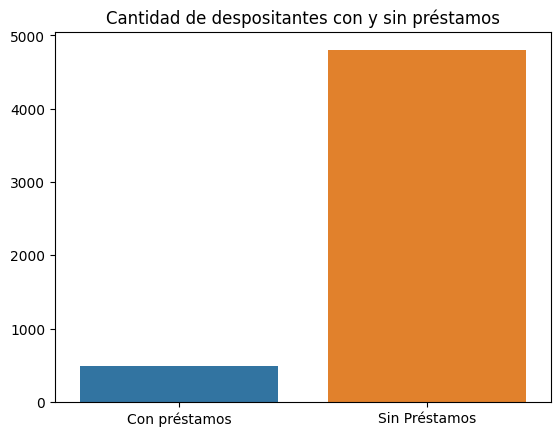

In [22]:
sns.barplot(x= listax, y= listay).set(title = "Cantidad de despositantes con y sin préstamos")

Es mucho mayor el número de depositantes que no tienen préstamo. Esto puede afectar enormemente a la capacidad del algoritmo de preveer sin un cliente del banco es más o menos probable de hacer un depósito.

In [23]:
grouped2 = df.groupby(['housing', 'p_fijo']).sum(numeric_only=True)

In [24]:
grouped2

age  default   balance  loan     day  duration  campaign  \
housing p_fijo                                                                
0       0       720850      357  25337634  2658  271780   3591460     50107   
        1       145442       23   6721708   219   50860   1563351      7036   
1       0       909524      406  26709275  4102  362672   5238600     63525   
        1        74951       29   2821065   265   29312   1278400      4288   

                  pdays  previous  
housing p_fijo                     
0       0        315839      5853  
        1        212062      3882  
1       0       1138175     14194  
        1        151308      2308

In [25]:
housingdeposit = df[((df['housing'] == 1) & (df['p_fijo']== 1))] # Contamos la cantidad de filas que coinciden con personas que tienen una hipoteca e hicieron un depósito en plazo fijo
housingdeposit.p_fijo.count()

1935

In [26]:
nohousingdeposit = df[((df['housing'] == 0) & (df['p_fijo']== 1))] # Contamos la cantidad de filas de personas que hicieron un depósito de plazo fijo y que no tienen hipotecas.
nohousingdeposit.p_fijo.count()

3354

In [27]:
listax2 = ['Con hipoteca', 'Sin hipoteca']
listay2 = [1935, 3354]

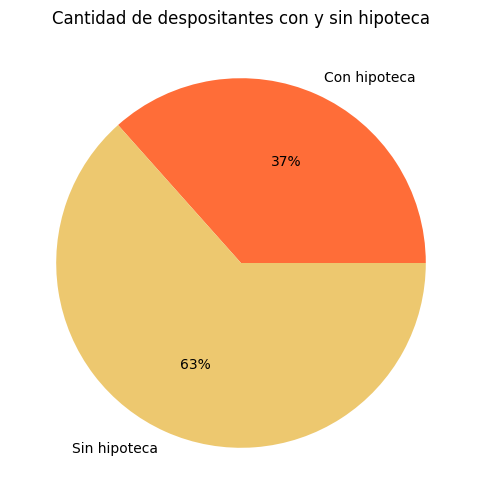

In [28]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
palette_color = sns.color_palette('rainbow_r')
plt.pie(listay2, labels= listax2, colors=palette_color, autopct='%.0f%%')
ax.set_title("Cantidad de despositantes con y sin hipoteca")

plt.show()

Es mayor el procentaje de personas que han hecho un depósito sin hipoteca.

In [29]:
df.p_fijo.sum()

5289

In [30]:
grouped3 = df.groupby(['housing', 'loan']).sum(numeric_only=True)
grouped3.reset_index(inplace=True)
grouped3['detalle'] = [1,2,3,4] 
grouped3['detalle'] = grouped3.detalle.replace(1,'no_debts')
grouped3['detalle'] = grouped3.detalle.replace(2, 'only_loan')
grouped3['detalle'] = grouped3.detalle.replace(3, 'only_housing')
grouped3['detalle'] = grouped3.detalle.replace(4, 'both')
grouped3

,housing,loan,age,default,balance,day,duration,campaign,pdays,previous,p_fijo,detalle
0,0,0,744257,212,29893786,276338,4437324,48569,479484,8791,3135,no_debts
1,0,1,122035,168,2165556,46302,717487,8574,48417,944,219,only_loan
2,1,0,812725,302,26086795,322215,5417363,55853,1084490,13664,1670,only_housing
3,1,1,171750,133,3443545,69769,1099637,11960,204993,2838,265,both


In [31]:
# definir una función para generar los valores de la nueva columna
def get_debt_status(row):
    if row['housing'] == 0 and row['loan'] == 0:
        return 'no_debts'
    elif row['housing'] == 1 and row['loan'] == 0:
        return 'only_housing'
    elif row['housing'] == 0 and row['loan'] == 1:
        return 'only_loan'
    elif row['housing'] == 1 and row['loan'] == 1:
        return 'both'
    else:
        return 'unknown'

# aplicar la función a cada fila del dataframe y crear la nueva columna
df['debt_status'] = df.apply(get_debt_status, axis=1)

In [32]:
import plotly_express as px

[Text(0.5, 1.0, 'Cantidad de depósitos por tipo de deuda y estado marital')]

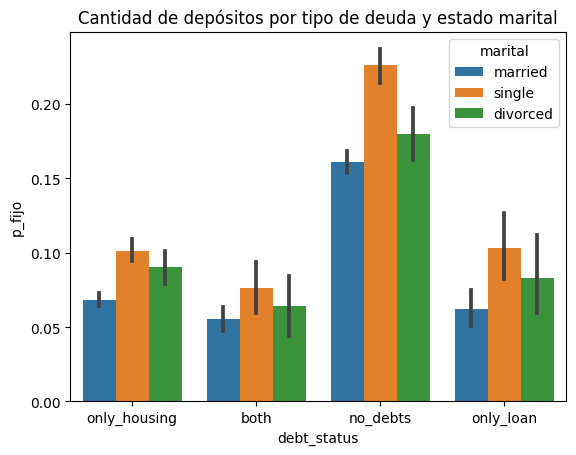

In [33]:
ax = sns.barplot(data=df, x='debt_status', y= 'p_fijo', hue= 'marital')
ax.set(title='Cantidad de depósitos por tipo de deuda y estado marital')

Sin duda las personas csin deudas tienen más posibilidad de hacer un depósito y de ellas las personas solteras. 

[Text(0.5, 1.0, 'Cantidad de depósitos por tipo de deuda y nivel educativo')]

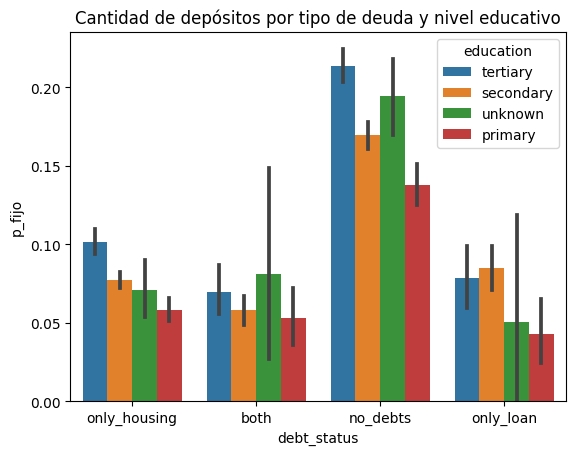

In [34]:
ax = sns.barplot(data=df, x='debt_status', y= 'p_fijo', hue= 'education')
ax.set(title='Cantidad de depósitos por tipo de deuda y nivel educativo')

[Text(0, 0, 'no_debts'),
 Text(1, 0, 'only_loan'),
 Text(2, 0, 'only_housing'),
 Text(3, 0, 'both')]

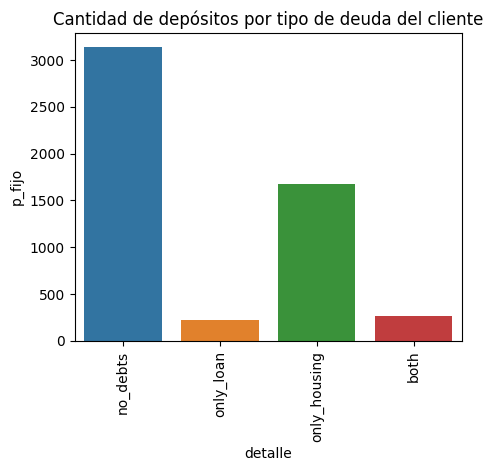

In [35]:
fig,ax = plt.subplots(figsize=(5,4))
ax= sns.barplot(data=grouped3, x='detalle', y= 'p_fijo')
ax.set(title='Cantidad de depósitos por tipo de deuda del cliente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [36]:
total_endeudados_prestamo = (df['loan'] == 1).sum()
depositantes_endeudados_prestamo = len(df[(df['loan'] == 1) & (df['p_fijo'] == 1)])
porcentaje_depositantes_prestamo = (depositantes_endeudados_prestamo/total_endeudados_prestamo)

total_endeudados_hipoteca = (df['housing'] == 1).sum()
depositantes_endeudados_hipoteca = len(df[(df['housing'] == 1) & (df['p_fijo'] == 1)])
porcentaje_depositantes_hipoteca = (depositantes_endeudados_hipoteca/total_endeudados_hipoteca)


total_endeudados_ambos = df[(df['loan'] == 1) & (df['housing'] == 1)].count()[0]
depositantes_endeudados_ambos = df[(df['loan'] == 1) & (df['p_fijo'] == 1) & (df['housing'] == 1)].count()[0]
porcentaje_endeudados_ambos = (depositantes_endeudados_ambos/total_endeudados_ambos)


print('Del total de personas con préstamos {}, el {:.2%} realizó un depósito. \nMientras que del total de clientes con hipotecas {} un {:.2%} realizó un depósito. \nPor último, del total de clientes endeudados {} un {:.2%} realizó un depósito.'.format(
    total_endeudados_prestamo,porcentaje_depositantes_prestamo,total_endeudados_hipoteca,porcentaje_depositantes_hipoteca,total_endeudados_ambos, porcentaje_endeudados_ambos))

Del total de personas con préstamos 7244, el 6.68% realizó un depósito. 
Mientras que del total de clientes con hipotecas 25130 un 7.70% realizó un depósito. 
Por último, del total de clientes endeudados 4367 un 6.07% realizó un depósito.


In [37]:
porcentajes_deudas = {'deuda': ['préstamo', 'hipoteca', 'ambos'], 'total': [total_endeudados_prestamo,total_endeudados_hipoteca, total_endeudados_ambos], 'porcentaje' : [
    porcentaje_depositantes_prestamo*100, porcentaje_depositantes_hipoteca*100,porcentaje_endeudados_ambos*100]}

porcentajes_deudas_df = pd.DataFrame(porcentajes_deudas)
porcentajes_deudas_df

,deuda,total,porcentaje
0,préstamo,7244,6.681391
1,hipoteca,25130,7.699960
2,ambos,4367,6.068239


[Text(0.5, 1.0, 'Porcentaje de depositantes sobre el total de clientes por tipo de deuda')]

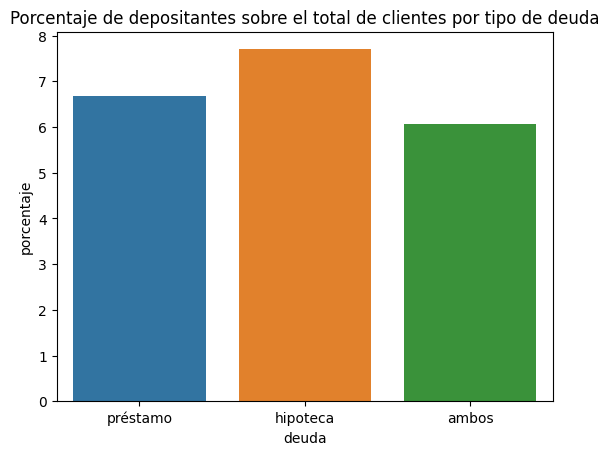

In [38]:
sns.barplot(data= porcentajes_deudas_df, x='deuda', y='porcentaje').set(title= 'Porcentaje de depositantes sobre el total de clientes por tipo de deuda')

Luego de nuestro análisis exhaustivo, sin dudas las personas sin hipotecas ni préstamos son más propensas a realizar un depósito. Como también vimos, aumenta la posibilidad si hablamos de una persona soltera y con un nivel terciario en educación.

> Avancemos con la 2° Hipótesis

In [39]:
edades = df.groupby(df['age']).count()

In [40]:
lista_edades = edades.columns.to_list()
to_drop= lista_edades[0:15]

In [41]:
edades.drop(columns= to_drop, inplace= True)

In [42]:
edades[0:27];

In [43]:
edades[0:27].p_fijo.sum();

In [44]:
edades[27:48].p_fijo.sum();

In [45]:
edades[27:48];

In [46]:
edades[48:-1];

In [47]:
edades[48:-1].p_fijo.sum();

In [48]:
edadesx= ['18-44', '45-65', '66-94']
edadesy= [edades[0:27].p_fijo.sum(), edades[27:48].p_fijo.sum(), edades[48:-1].p_fijo.sum()]

[Text(0.5, 1.0, 'Cantidad de depositantes de plazos fijos por grupo etario')]

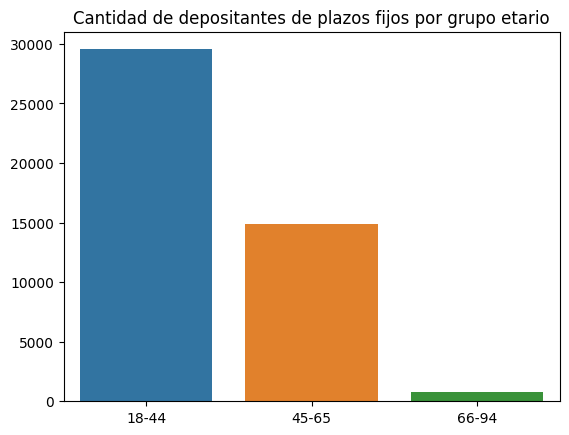

In [49]:
sns.barplot(x= edadesx, y= edadesy).set(title= 'Cantidad de depositantes de plazos fijos por grupo etario')

Al contar el total de depósitos por grupo etario podemos anular nuestra hipótesis de que el grupo etario de entre 18-44 años es menos probable de hacer un depósito. Ya que el gráfico nos está indicando lo contrario.

In [50]:
education = df.groupby(df['education']).sum(numeric_only=True)
education

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
education,,,,,,,,,,,
primary,314225,127,8570258,3894,1024,105652,1753397,19418,247196,3352,591
secondary,927251,458,26795544,14038,4303,365644,6002027,62664,982686,13173,2450
tertiary,526635,198,23388697,6378,1784,213967,3438555,37583,519060,8805,1996
unknown,82656,32,2835183,820,133,29361,477832,5291,68442,907,252


In [51]:
education = education.reset_index()

In [52]:
edx = education.education.unique()
edy = education.p_fijo.unique()
print(edx, edy)

['primary' 'secondary' 'tertiary' 'unknown'] [ 591 2450 1996  252]


[Text(0.5, 1.0, 'Cantidad de depositantes por nivel académico')]

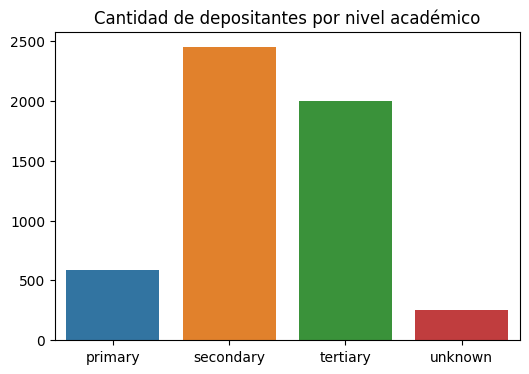

In [53]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x=edx, y=edy).set(title = "Cantidad de depositantes por nivel académico")

In [54]:
total_clientes_secundarios = len(df[df['education'] == 'secondary'])
secundario_con_deposito = len(df[(df['education'] == 'secondary') & (df['p_fijo'] == 1)])
porcentaje_secundario = (secundario_con_deposito/total_clientes_secundarios)

total_clientes_terciarios = len(df[df['education'] == 'tertiary'])
terciario_con_deposito = len(df[(df['education'] == 'tertiary') & (df['p_fijo'] == 1)])
porcentaje_terciario = (secundario_con_deposito/total_clientes_terciarios)

print('Del total de clientes con nivel secundario {}, solo el {:.2%} realizó un depósito. \nMientras que del nivel terciario, del total {}, un {:.2%} realizó un depósito'.format(total_clientes_secundarios, porcentaje_secundario,total_clientes_terciarios, porcentaje_terciario))

Del total de clientes con nivel secundario 23202, solo el 10.56% realizó un depósito. 
Mientras que del nivel terciario, del total 13301, un 18.42% realizó un depósito


In [55]:
porcentajes = {'nivel educativo': ['secundario', 'terciario'],'total de clientes' : [total_clientes_secundarios, total_clientes_terciarios], 'total depositantes' : [secundario_con_deposito, terciario_con_deposito], 'porcentaje' : [porcentaje_secundario, porcentaje_terciario]}
porcentaje_df = pd.DataFrame(porcentajes)
porcentaje_df

,nivel educativo,total de clientes,total depositantes,porcentaje
0,secundario,23202,2450,0.105594
1,terciario,13301,1996,0.184197


[Text(0.5, 1.0, 'Porcentaje de depositantes sobre el total de clientes por nivel académico')]

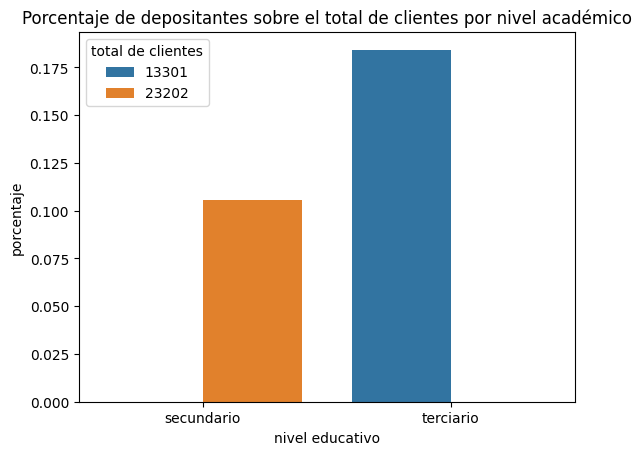

In [56]:
sns.barplot(data= porcentaje_df, x='nivel educativo', y='porcentaje', hue= 'total de clientes').set(title= 'Porcentaje de depositantes sobre el total de clientes por nivel académico')

Nuestra 3° Hipótesis versa sobre que las personas con un nivel de educación terciario son las que tienen mayor probabilidad de hacer un depósito. Puede ser cierto, ya que a pesar que hay más depositantes en total de nivel secundario, en general es menor el porcentaje de depositantes por el total de clientes. En el nivel terciario tenemos menor cantidad de clientes, por lo tanto menor cantidad de depósitos, sin embargo el porcentaje de depositantes sobre el total es mayor, indicando una mayor probabilidad.

> Solo por curiosidad quiero medir el nivel de balance que tienen estos grupos ya que puede pasar que hayan menos depositantes pero que depositen más dinero.

In [57]:
education2 = df.groupby(df['education']).mean(numeric_only=True)
education2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
education,,,,,,,,,,,
primary,45.865567,0.018537,1250.949934,0.568384,0.149467,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,0.019740,1154.880786,0.605034,0.185458,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,0.014886,1758.416435,0.479513,0.134125,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,0.017232,1526.754443,0.441572,0.071621,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [58]:
education2 = education2.reset_index()

In [59]:
ed2x = education2.education.unique()
ed2y = education2.balance.unique()

[Text(0.5, 1.0, 'Promedio de balance por grupo educativo')]

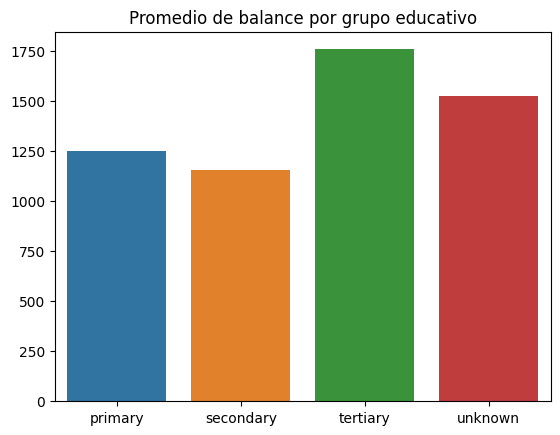

In [60]:
sns.barplot(x=ed2x, y=ed2y).set(title = "Promedio de balance por grupo educativo")

Bueno, el gráfico es revelador, ya que a pesar de que el grupo con nivel educativo terciario tiene menor cantidad de depositantes, su balance tiende a ser mayor, por lo que también es posible asumir que la cantidad de dinero que de positen también debe ser mayor. 

In [61]:
m_state = df.groupby(df['marital']).sum(numeric_only=True)
m_state

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
marital,,,,,,,,,,,
divorced,238392,128,6138388,2907,921,82252,1366927,13699,213496,2871,622
married,1181308,448,38805139,15321,4660,431464,6896375,77366,1032784,15146,2755
single,431067,239,16646155,6902,1663,200908,3408509,33891,571104,8220,1912


In [62]:
m_state = m_state.reset_index()
m_state

,marital,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
0,divorced,238392,128,6138388,2907,921,82252,1366927,13699,213496,2871,622
1,married,1181308,448,38805139,15321,4660,431464,6896375,77366,1032784,15146,2755
2,single,431067,239,16646155,6902,1663,200908,3408509,33891,571104,8220,1912


In [63]:
msx = m_state.marital.unique()
msy = m_state.p_fijo.unique()

[Text(0.5, 1.0, 'Cantidad de depositantes por estado civil')]

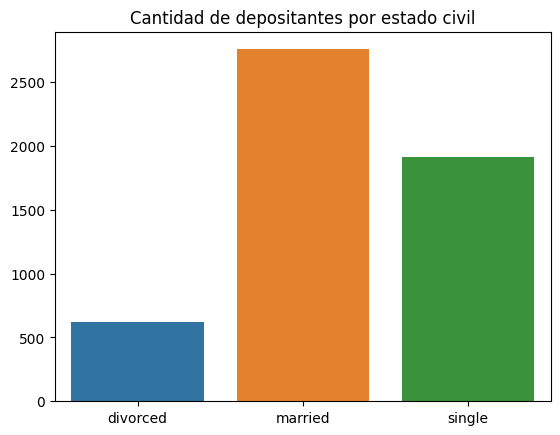

In [64]:
sns.barplot(x=msx, y=msy).set(title = "Cantidad de depositantes por estado civil")

In [65]:
m_state2 = df.groupby(df['marital']).mean(numeric_only=True)
m_state2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
marital,,,,,,,,,,,
divorced,45.782984,0.024582,1178.872287,0.558287,0.176877,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,0.016462,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,0.018686,1301.497654,0.539640,0.130023,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [66]:
m_state2 = m_state2.reset_index()
m_state2

,marital,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
0,divorced,45.782984,0.024582,1178.872287,0.558287,0.176877,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
1,married,43.408099,0.016462,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
2,single,33.703440,0.018686,1301.497654,0.539640,0.130023,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [67]:
ms2x = m_state2.marital.unique()
ms2y = m_state2.balance.unique()

[Text(0.5, 1.0, 'Promedio de balance por estado civil')]

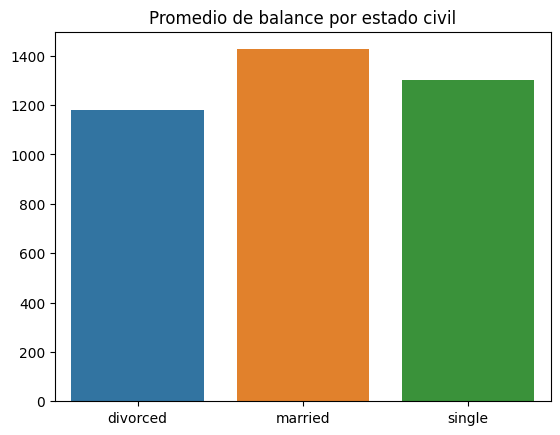

In [68]:
sns.barplot(x=ms2x, y=ms2y).set(title = "Promedio de balance por estado civil")

In [69]:
total_divorciados = len(df[df['marital'] == 'divorced'])
divorciados_depositantes = len(df[(df['marital'] == 'divorced') & (df['p_fijo'] == 1)])
porcentaje_divorciados = (divorciados_depositantes/total_divorciados)

total_casados = len(df[df['marital'] == 'married'])
casados_depositantes = len(df[(df['marital'] == 'married') & (df['p_fijo'] == 1)])
porcentaje_casados = (casados_depositantes/total_casados)

total_solteros= len(df[df['marital'] == 'single'])
solteros_depositantes = len(df[(df['marital'] == 'single') & (df['p_fijo'] == 1)])
porcentaje_solteros = (solteros_depositantes/total_solteros)


print('Del total de divorciados {}, solo el {:.2%} realizó un depósito. \nMientras que de los casados {}, un {:.2%} realizó un depósito \nPor último del total de solteros, {} un {:.2%} realizó un depósito'.format(total_divorciados,porcentaje_divorciados,total_casados,porcentaje_casados,total_solteros,porcentaje_solteros))

Del total de divorciados 5207, solo el 11.95% realizó un depósito. 
Mientras que de los casados 27214, un 10.12% realizó un depósito 
Por último del total de solteros, 12790 un 14.95% realizó un depósito


In [70]:
porcentajes = {'estado civil': ['divorciado', 'casado', 'soltero'],'total de clientes' : [ total_divorciados, total_casados, total_solteros], 'total depositantes' : [divorciados_depositantes,casados_depositantes,solteros_depositantes ], 'porcentaje' : [porcentaje_divorciados, porcentaje_casados, porcentaje_solteros ]}
porcentaje_marital_df = pd.DataFrame(porcentajes)
porcentaje_marital_df

,estado civil,total de clientes,total depositantes,porcentaje
0,divorciado,5207,622,0.119455
1,casado,27214,2755,0.101235
2,soltero,12790,1912,0.149492


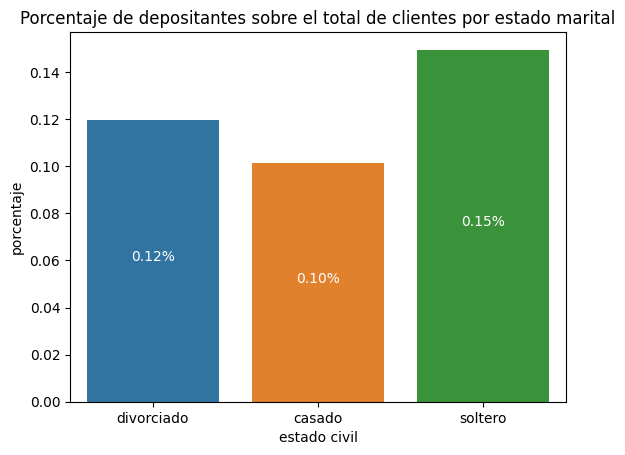

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# crear el gráfico de barras
ax = sns.barplot(data=porcentaje_marital_df, x='estado civil', y='porcentaje')

# agregar las etiquetas de valores en cada barra
for i in range(len(porcentaje_marital_df)):
    ax.text(x=i, y=porcentaje_marital_df.iloc[i]['porcentaje']/2, 
            s="{:.2f}%".format(porcentaje_marital_df.iloc[i]['porcentaje']), 
            ha='center', fontsize=10, color='white')

# establecer el título del gráfico
ax.set(title='Porcentaje de depositantes sobre el total de clientes por estado marital')

# mostrar el gráfico
plt.show()


Para nuestra 4° Hipotesis, que dice que las personas casadas tienen más posibilidad de hacer un depósito, podemos ver que son las personas que mayor cantidad depósitos han hecho. También es mayor la cantidad de clientes del banco que su estado civil es casado. Se encontró que dentro del grupo de clientes solteros, el porcentaje de depósitos es mayor que al resto del grupo. Por lo que a pesar de que la mayoría de clientes casados han hecho un depósito, demuestra que a pesar de ser una minoría, este grupo tiene un poco más de posibilidad de hacer un depósito. En cuanto a la probabilidad como tal, mantengo que la hipótesis es correcta, ya que la mayorái de depositantes es casado y además la diferencia porcentual no es lo suficiente para descartar la hipótesis. 

#### Análisis de probabilidad condicional 

P(A|B)=P(A ∩ B)/P(B)

In [72]:
df.p_fijo.sum()

5289

In [73]:
percent = (5289*100 ) / 45211 

In [74]:
100 - percent

88.30151954170445

45.211 personas, de las cuales solo 5.289 han hecho un depósito. Lo que quiere decir, es que solo un 11,7% de los usuarios, han hecho un depósito. El otro 88,3% de los usuarios, no ha hecho un depósito.

In [75]:
endeudados = df[((df['housing'] == 1) & (df['loan']== 1) & (df['p_fijo'] == 1))] 
endeudados.count()[0]

265

In [76]:
5289-265

5024

De las 5.289 personas, solo 265, han hecho un depósito teniendo un préstamo y una hipoteca. Por lo que es mucho más probable que una persona haga un depósito sin préstamos ni hipotecas (5.024)

> ¿Y entre la hipoteca y el préstamo, cual de las dos repercute más en la posibilidad de hacer un depósito?

In [77]:
hipotecados = df[((df['housing'] == 1) & (df['loan']== 0) & (df['p_fijo'] == 1))]
hipotecados.count()[0]

1670

In [78]:
(1670*100)/5289

31.57496691245982

In [79]:
con_prestamo = df[((df['housing'] == 0) & (df['loan']== 1) & (df['p_fijo'] == 1))]
con_prestamo.count()[0]

219

Por los resultados arrojados, es más posible que una persona con una hipoteca haga un depósito que una persona con un préstamo. De hecho, del total de depósitos, un 31,57% corresponde a personas con hipotecas (pero sin préstamos). 

In [80]:
mayor_prob = df[((df['housing'] == 0) & (df['loan']== 0) & (df['p_fijo'] == 1))]
mayor_prob.count()[0]

3135

In [81]:
resul= (3135)/5289

In [82]:
print('El {:.2%} de depositos es sin préstamo ni hipoteca'.format(resul))

El 59.27% de depositos es sin préstamo ni hipoteca


In [83]:
PA = 5289/45211
PA

0.11698480458295547

In [84]:
PB= 3135/45211
PB

0.0693415319280706

In [85]:
PC=PB/PA
PC*100

59.27396483267159

La probabilidad condicional de que una persona haga un depósito sin préstamos ni hipotecas es del 59% 

# Desafío de consumo de API y DATA WRANGLING:

> Ahora buscaremos ver como se distribuye el balance por tipo de trabajo

Para eso, vamos a utilizar una api que nos permita convertir el valor de euro (el que está en el dataframe, a pesos argentinos)

In [86]:
import requests
import json

In [87]:
url = "https://cdn.jsdelivr.net/gh/fawazahmed0/currency-api@1/latest/currencies/eur/ars.json"
response = requests.request("GET", url)

print(response.text) #Nos trae el precio de conversión del euro a pesos argentinos.

{
    "date": "2023-05-29",
    "ars": 253.296507
}


In [88]:
texto = response.text
json.loads(texto)

{'date': '2023-05-29', 'ars': 253.296507}

In [89]:
jsondata=json.loads(texto)
df2=pd.DataFrame(jsondata, index=[0])
df2.head()

,date,ars
0,2023-05-29,253.296507


In [90]:
df1 = pd.read_csv('bank-full.csv', sep = ';')

In [91]:
df1 = pd.DataFrame(df1)

In [92]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [93]:
df1 = pd.concat([df1,df2], axis=0)

In [94]:
df1 = df1.reset_index()

In [95]:
mask = df1.pop('date')

In [96]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,NaN
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,NaN
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,NaN
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,NaN
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,NaN
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,NaN
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,NaN
45210,45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17.0,nov,361.0,2.0,188.0,11.0,other,no,NaN


In [97]:
df1['ars'] = df1['balance'] * df1['ars'][45211]

In [98]:
df1['ars']

0        5.428144e+05
1        7.345599e+03
2        5.065930e+02
3        3.814645e+05
4        2.532965e+02
             ...     
45207    4.379497e+05
45208    1.447590e+06
45209    1.692021e+05
45210    7.525439e+05
45211             NaN
Name: ars, Length: 45212, dtype: float64

In [99]:
df1 = df1.drop(45211)

In [100]:
df1['ars'] = pd.to_numeric(df1['ars'])

In [101]:
df1['ars'] = df1['ars'].astype(int)

In [102]:
df1.rename(columns = {'ars':'ars_balance'}, inplace = True)

In [103]:
df1

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,ars_balance
0,0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,542814
1,1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,7345
2,2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,506
3,3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,381464
4,4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,yes,208969
45207,45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,yes,437949
45208,45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,yes,1447589
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,no,169202


In [104]:
grouped = df1['ars_balance'].groupby(df1['job']).median()
grouped

job
admin.           100305.0
blue-collar       98279.0
entrepreneur      89160.0
housemaid        102838.0
management       144885.0
retired          199343.5
self-employed    133233.0
services          85993.5
student          127154.0
technician       106637.0
unemployed       133993.0
unknown          171481.0
Name: ars_balance, dtype: float64

In [105]:
groupeddf = pd.DataFrame(grouped)
groupeddf.columns

Index(['ars_balance'], dtype='object')

In [106]:
groupeddf['ars_balance'] = groupeddf['ars_balance'].apply(lambda x: float("{:.2f}".format(x)))
groupeddf

,ars_balance
job,
admin.,100305.0
blue-collar,98279.0
entrepreneur,89160.0
housemaid,102838.0
management,144885.0
retired,199343.5
self-employed,133233.0
services,85993.5
student,127154.0


In [107]:
groupeddf= groupeddf.drop('unknown')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed')])

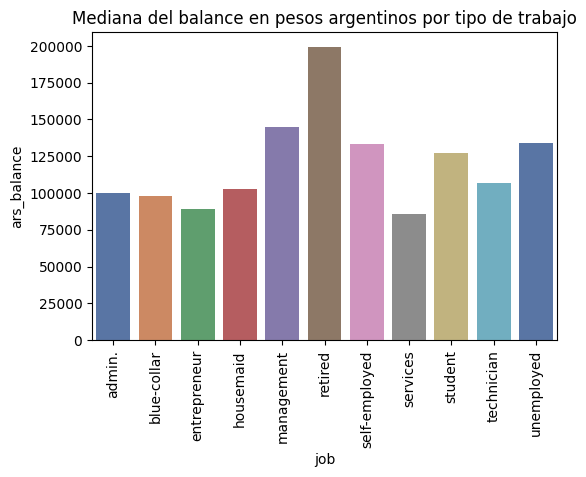

In [108]:
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data= groupeddf, x= groupeddf.index, y= groupeddf.ars_balance, palette= 'deep')
plt.title('Mediana del balance en pesos argentinos por tipo de trabajo')
plt.xticks(rotation=90)

In [109]:
job_p_fijo_sum = df['p_fijo'].groupby(df['job']).sum()
job_p_fijo_sum

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: p_fijo, dtype: int64

In [110]:
job_p_fijo_sum = pd.DataFrame(job_p_fijo_sum)
job_p_fijo_sum.columns

Index(['p_fijo'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'blue-collar'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'housemaid'),
  Text(4, 0, 'management'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'services'),
  Text(8, 0, 'student'),
  Text(9, 0, 'technician'),
  Text(10, 0, 'unemployed'),
  Text(11, 0, 'unknown')])

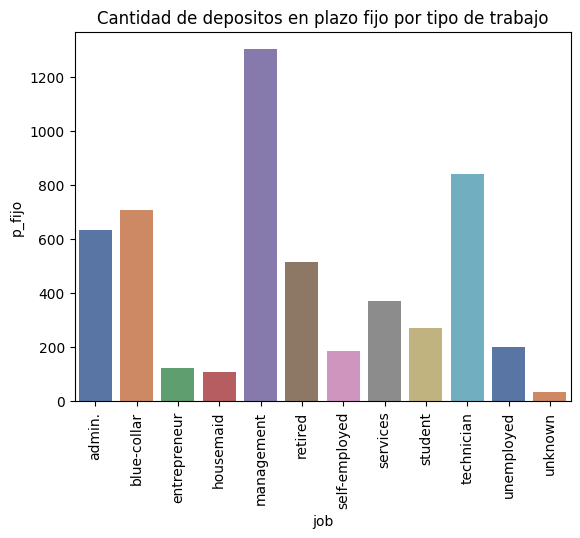

In [111]:
sns.barplot(data= job_p_fijo_sum, x= job_p_fijo_sum.index, y= job_p_fijo_sum.p_fijo, palette= 'deep')
plt.title('Cantidad de depositos en plazo fijo por tipo de trabajo')
plt.xticks(rotation=90)

In [112]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [113]:

url = "https://api.estadisticasbcra.com/plazo_fijo"
headers = {os.getenv('header1') : os.getenv('header2')}
r = requests.get(url, headers=headers)

In [114]:
r.text;

In [115]:
text = r.text
json_bcra= json.loads(text)

In [116]:
df2=pd.DataFrame(json_bcra)
df2.tail()

,d,v
6723,2023-04-04,12639338
6724,2023-04-05,12715100
6725,2023-04-10,12498728
6726,2023-04-11,12735550
6727,2023-04-12,12722924


In [117]:
df2.rename(columns={'d' : 'fecha','v': 'p_fijo'}, inplace = True)

In [118]:
df2['fecha'] =  pd.to_datetime(df2['fecha'], format='%Y-%m-%d')

In [119]:
df2

,fecha,p_fijo
0,1996-01-02,26134
1,1996-01-03,26014
2,1996-01-04,26251
3,1996-01-05,26432
4,1996-01-08,26472
...,...,...
6723,2023-04-04,12639338
6724,2023-04-05,12715100
6725,2023-04-10,12498728
6726,2023-04-11,12735550


In [120]:
type(df2.fecha[0])

pandas._libs.tslibs.timestamps.Timestamp

In [121]:
df2['year'] = df2['fecha'].dt.to_period('Y')

In [122]:
groupeddf2= df2.groupby('year').first()

In [123]:
groupeddf2.reset_index(inplace= True)

In [124]:
groupeddf2

,year,fecha,p_fijo
0,1996,1996-01-02,26134
1,1997,1997-01-02,31063
2,1998,1998-01-02,41465
3,1999,1999-01-04,47203
4,2000,2000-01-03,51103
5,2001,2001-01-02,55496
6,2002,2002-01-02,27630
7,2003,2003-01-02,21746
8,2004,2004-01-02,38165
9,2005,2005-01-03,46113


In [125]:
df2.year= df2.year.astype(str)

In [126]:
groupeddf2.p_fijo = groupeddf2.p_fijo.astype(int)
groupeddf2.year= groupeddf2.year.astype(str)

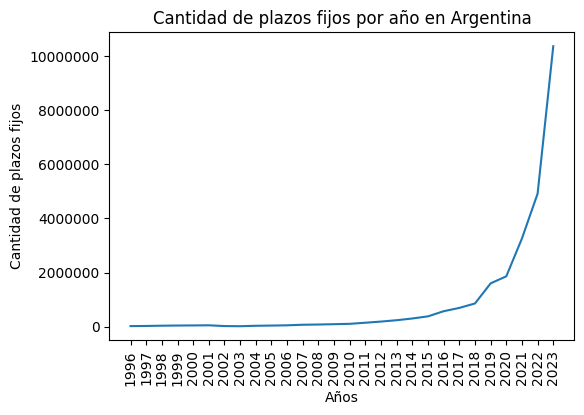

In [127]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(6,4))
plt.style.use('_mpl-gallery')

plt.plot(groupeddf2.year,groupeddf2.p_fijo)

plt.title('Cantidad de plazos fijos por año en Argentina')

plt.ylabel('Cantidad de plazos fijos')

plt.xlabel('Años')

plt.ticklabel_format(axis="y", style='plain')

plt.xticks(rotation=90);

# Desafío de Data Storytelling 28/03/23

En cuanto a las campañas de marketing directo, ¿cuál fue la más efectiva, es decir, cuál de todas generó mayor depósitos en plazo fijo?

>Primero veamos la frecuencia que tuvieron las campañas

In [128]:
df.campaign.value_counts().head(5)

1    17544
2    12505
3     5521
4     3522
5     1764
Name: campaign, dtype: int64

Podemos ver que la campaña con más frecuencia, fue la 1, luego la 2, la 3 y así sucesivamente.

> Veamos ahora que campaña fue más efectiva, es decir, que mayor cantidad de plazos fijos tiene, vamos a aprovechar para cruzar variables

In [129]:
campañas_trabajo= df.groupby(['campaign', 'job']).sum(numeric_only=True).reset_index()
campañas_trabajo

,campaign,job,age,default,balance,housing,loan,day,duration,pdays,previous,p_fijo
0,1,admin.,87841,20,2627674,1413,418,33616,558732,123257,1498,339
1,1,blue-collar,144053,74,4022331,2726,635,52527,971792,186590,1846,322
2,1,entrepreneur,24129,27,904218,349,129,8332,147663,22447,290,48
3,1,housemaid,20240,10,576711,147,45,6250,107081,12784,169,47
4,1,management,139862,58,6470752,1875,496,51762,903054,177292,2512,589
...,...,...,...,...,...,...,...,...,...,...,...,...
322,50,blue-collar,70,0,710,2,1,54,212,-2,0,0
323,51,management,30,0,358,1,0,19,88,-1,0,0
324,55,technician,35,0,432,1,0,21,1094,-1,0,0
325,58,technician,24,0,126,1,0,20,10,-1,0,0


In [130]:
campañas_trabajo = campañas_trabajo[campañas_trabajo['campaign'] <= 4]

In [131]:
import plotly.express as px

px.bar(campañas_trabajo, x= 'campaign', y= 'p_fijo', title="Cant. de plazos fijos por campaña y tipo de trabajo", 
       labels= {
           'p_fijo' : 'cant. de plazos fijos' , 
           'campaign' : 'Campañas', 
           'job' : 'trabajos'}, 
       color='job')

Fácilmente, podemos ver también, que la frecuencia pudo haber tenido algo que ver con la efectividad en los depósitos. Aprovechamos a ver por cantidad de plazos fijos y el tipo de trabajo que más estuvo presente en la campaña.

Por ejemplo: La campaña 1,2, 3 tienen más depósitos el tipo de trabajo "Blue Collar". En la campaña 4 no, gana "management". Por poco. 

Lo que podemos concluir viendo este gráfico, es que los tipos de trabajo de "Blue Collar", "Management", "technician" son los tipos de trabajo que más depósitos han realizado y esto puede servir, para en un futuro, hacer un target específico a estos grupos.

In [132]:
campañas_marital= df.groupby(['campaign', 'marital']).sum(numeric_only=True).reset_index()
campañas_marital.head()

,campaign,marital,age,default,balance,housing,loan,day,duration,pdays,previous,p_fijo
0,1,divorced,97616,45,2588752,1233,397,30862,567530,104660,1200,305
1,1,married,435818,157,15046932,5935,1738,147375,2557074,478478,6081,1283
2,1,single,179989,90,7190140,2950,694,80465,1455321,284916,3533,973
3,2,divorced,64565,31,1682446,781,220,22460,396758,58836,776,176
4,2,married,330480,113,10928739,4225,1308,117814,2063587,298555,4413,736


In [133]:
campañas_marital = campañas_marital[campañas_marital['campaign'] <= 4]

In [134]:
px.bar(campañas_marital, x= 'campaign', y= 'p_fijo', title="Cantidad de plazos fijos por campaña y por tipo de estado marital", 
       labels= {
    'p_fijo' : 'cant. de plazos fijos' , 
    'campaign' : 'Campañas', 
    'marital' : 'estado marital'}, 
       color='marital')

Con este gráfico podemos ver que las personas con estado marital "Casado", y "Single" son los estados maritales que mayor depósitos hicieron, por lo tanto, vemos una alta posibilidad de que en futuras campañas, estos dos grupos sean los más receptivos a realizar un depósito fijo.

En conclusión, viendo los dos gráficos podemos concluir en que la campaña 1 tuvo más difusión, más contactos y esto tuvo una gran causalidad con los resultados de depósitos. También vemos una similitud en todas las campañas con los tipos de trabajo y estado marital en cada campaña. Por lo tanto, podemos deducir que las campañas tuvieron una gran diferencia en la cantidad de personas contactadas.

> En cuanto a los meses, existirá algún patrón, algún mes o meses que indiquen un patrón? 

In [135]:
month_grouped= df.groupby('month').sum(numeric_only=True).sort_values(by='month', ascending=True).reset_index()

In [136]:
import datetime

In [137]:
months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_grouped["month"] = pd.Categorical(month_grouped["month"], categories=months, ordered=True)
month_grouped.sort_values("month", inplace=True)

In [138]:
df2["month"] = pd.DatetimeIndex(df2["fecha"]).strftime("%b").str.lower()
df2["year"] = pd.DatetimeIndex(df2["fecha"]).year

In [139]:
arg_month = df2.groupby('month').sum(numeric_only=True).reset_index()     

In [140]:
arg_month["month"] = pd.Categorical(arg_month["month"], categories=months, ordered=True)
arg_month.sort_values("month", inplace=True)

In [141]:
arg_month['valor_normalizado'] = ((arg_month.p_fijo - arg_month.p_fijo.min())/ (arg_month.p_fijo.max()-arg_month.p_fijo.min()))

In [142]:
month_grouped['valor_normalizado'] = ((month_grouped.p_fijo - month_grouped.p_fijo.min())/ (month_grouped.p_fijo.max()-month_grouped.p_fijo.min()))

In [143]:
from plotly import graph_objects as go
# Crear trazas de línea
trace1 = go.Scatter(x=arg_month['month'], y=arg_month['valor_normalizado'], name='Argentina', mode='lines')
trace2 = go.Scatter(x=month_grouped['month'], y=month_grouped['valor_normalizado'], name='Portugal', mode='lines')

# Crear una lista de datos
data = [trace1, trace2]

# Crear un objeto Layout
layout = go.Layout(title='Comparación entre la cantidad de plazos fijos en argentina y en el banco de Portugal', xaxis_title='Meses', yaxis_title='Cantidad de plazos fijos') 

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura
fig.show()


Se puede ver una especie de inversión en las tendencias. Es decir, en enero en aRgentina tenemos un punto de grandes cantidades de plazo fijo pero en Portugal no. En Mayo se registra el menor mes de plazos fijos en argentina, pero el mayor mes en Portugal. Esto puede indicar algún patrón relacionado a la estacionalidad. Sin embargo en ambos países de Junio a Agosto se registra una misma pendiente. De todas formas la gran cantidad de diferencia en los datos de cada dataset puede que no permita hacer una conclusión precisa.

In [144]:
px.bar(df.poutcome.value_counts(), color= df.poutcome.unique())

La gran mayoría de resultados de las campañas, no están registrados, se desconoce o han fallado.

In [145]:
corr = df.corr(numeric_only=True)

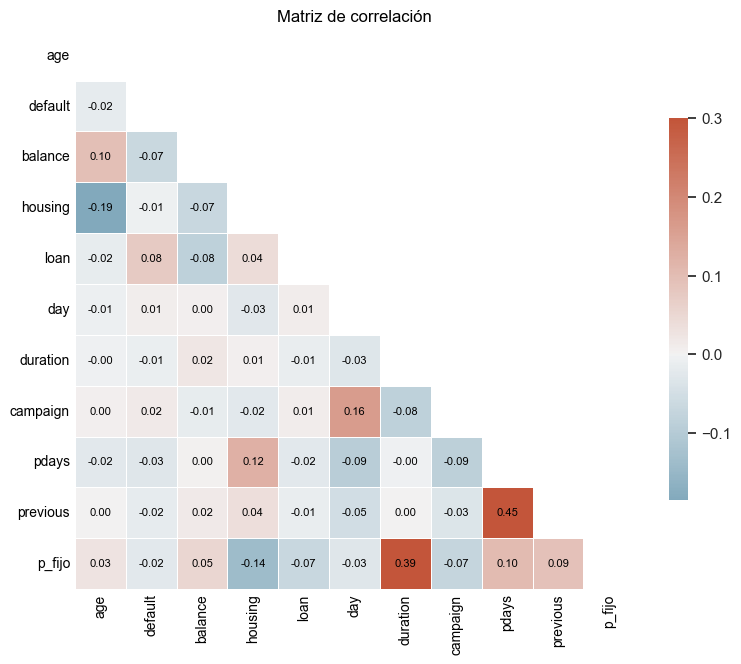

In [146]:
# generar una máscara para la diagonal superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# establecer el tamaño del gráfico
f, ax = plt.subplots(figsize=(8, 8))

# generar una paleta de colores personalizada
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# establecer el color para los cuadrados por encima de la diagonal
sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# dibujar el heatmap con la máscara y el ratio de aspecto correcto
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt='.2f', annot_kws={"fontsize":8, "color":'black'})

# personalizar el gráfico
ax.set_title('Matriz de correlación')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# mostrar el gráfico
plt.show()


Podemos ver que nuestras variables númericas no están muy relacionadas. Sobre todo en la variable objetivo "p_fijo".

# Obtención de insights 06 de abril de 2023 

Qué paso con los resultados de campañas anteriores, podremos encontrar algo claro con respecto al resultado de la campaña anterior y como refleja esto en la cantidad de depósitos?

In [147]:
outcome_grouped = df.groupby('poutcome').sum(numeric_only=True)
outcome_grouped.reset_index(inplace=True)
outcome_grouped

,poutcome,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,p_fijo
0,failure,199893,39,7183913,3470,774,69431,1196755,9708,1183637,14196,618
1,other,73144,16,2736837,1199,265,26634,470516,4529,422618,7377,307
2,success,64920,2,2930284,471,82,21833,478789,2729,246685,4647,978
3,unknown,1512810,758,48738648,19990,6123,596726,9525751,107990,-35556,17,3386


Text(0.5, 0, 'Resultado de la campaña anterior')

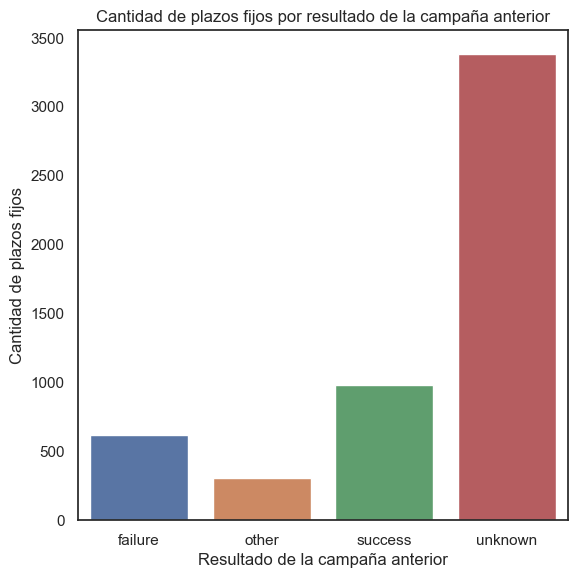

In [148]:
f, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=outcome_grouped, x='poutcome', y='p_fijo').set(title="Cantidad de plazos fijos por resultado de la campaña anterior")
plt.ylabel('Cantidad de plazos fijos')
plt.xlabel('Resultado de la campaña anterior')

La gran mayoría de plazos fijos no se sabe de que campaña anterior fue, en segundo lugar, los plazos fijos que el resultado de la campaña anterior fue exitoso es el que mayor cantidad registra. sorprende que en 3er lugar esté el resultado de fracaso en la campaña anterior. Esto puede indicar, que a pesar de que una campaña no tenga un resultado deseado, no quita la posibilidad de que la persona haga un depósito. También nos da a entender que hay que mejorar el sistema de creación de datos porque la gran mayoría de depósito se desconocer el resultado de la campaña anterior.

In [149]:
columns= ['age', 'balance','day', 'month', 'duration', 'campaign', 'pdays', 'previous']

In [150]:
def scatter_columns_in_grid(df, columns):
    # Create a PairGrid
    g = sns.PairGrid(df[columns])

    # Map a scatter plot onto each subplot
    g.map(sns.scatterplot, hue= df.marital, legend=True)
    plt.show()

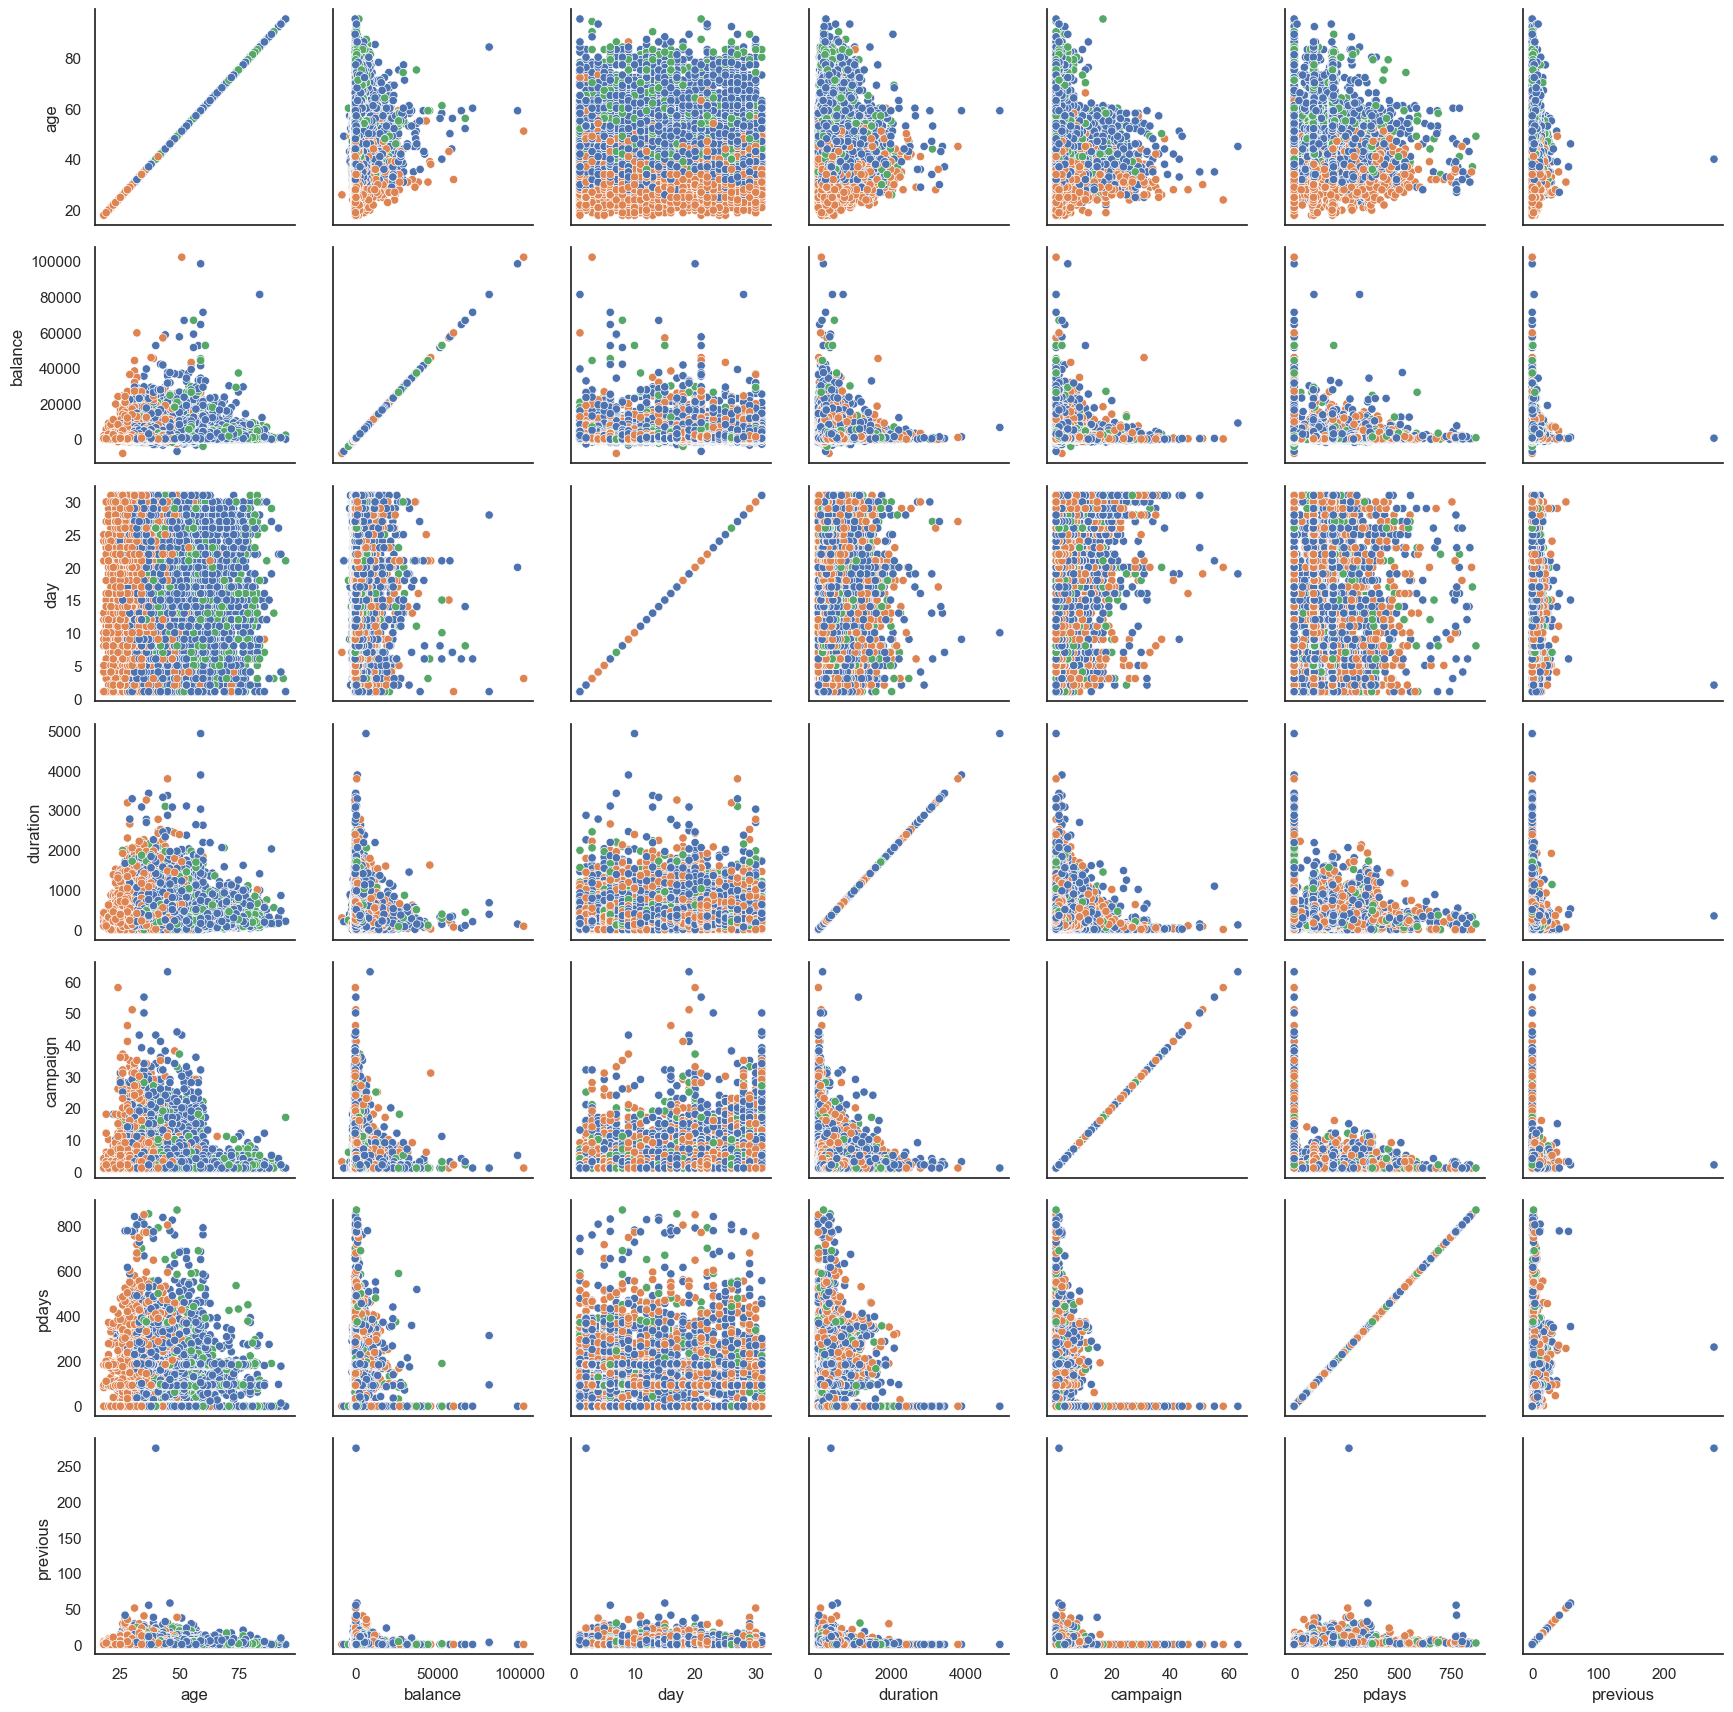

In [151]:
scatter_columns_in_grid(df,columns)

[Text(0.5, 1.0, 'Distribución del balance por edad')]

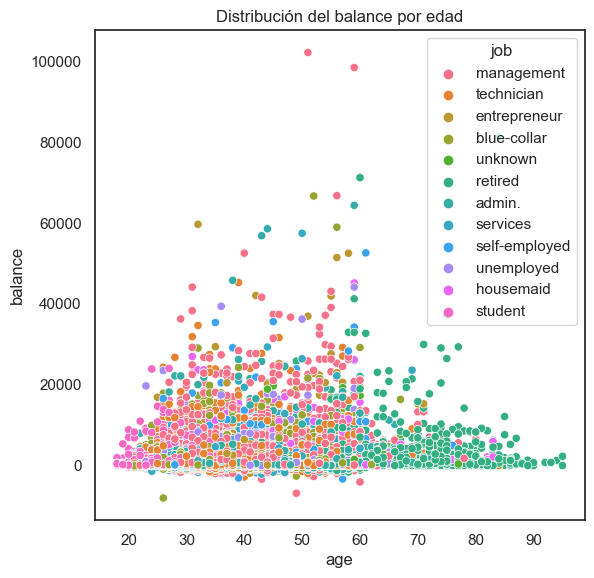

In [152]:
f, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x='age', y='balance', hue= 'job').set(title='Distribución del balance por edad')

In [153]:
days_group= df.groupby(['day','campaign']).sum(numeric_only=True)
days_group.reset_index(inplace=True)
days_group

,day,campaign,age,default,balance,housing,loan,duration,pdays,previous,p_fijo
0,1,1,8537,3,406399,54,34,53359,15344,206,55
1,1,2,3841,0,210008,27,15,27619,4081,96,25
2,1,3,719,0,43216,6,5,4400,719,7,5
3,1,4,373,1,2706,2,3,2809,844,17,2
4,1,5,181,0,4609,0,0,1180,392,13,2
...,...,...,...,...,...,...,...,...,...,...,...
669,31,38,44,0,0,0,0,21,-1,0,0
670,31,39,34,0,4,1,0,33,-1,0,0
671,31,43,33,0,0,1,1,16,-1,0,0
672,31,44,49,0,371,1,0,18,-1,0,0


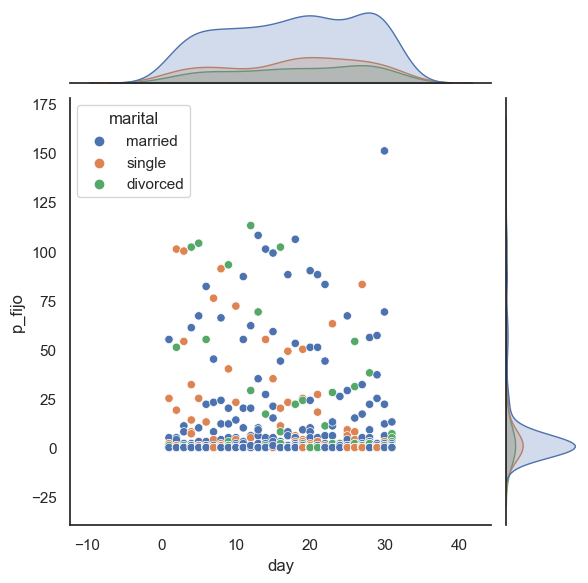

In [154]:
sns.jointplot(data=days_group, x='day', y= 'p_fijo', hue=df.marital)

In [155]:
month_group= df.groupby(['month','campaign']).sum(numeric_only=True)
month_group.reset_index(inplace=True)
month_group

,month,campaign,age,default,balance,housing,loan,day,duration,pdays,previous,p_fijo
0,apr,1,58366,8,2253429,982,167,25850,437814,133780,1278,332
1,apr,2,31736,2,1290286,595,104,13470,263230,81685,992,134
2,apr,3,14007,1,447254,280,53,6085,106890,37573,429,61
3,apr,4,5942,0,230870,108,21,2483,35319,13733,162,26
4,apr,5,3244,0,126861,59,5,1465,18025,6491,112,15
...,...,...,...,...,...,...,...,...,...,...,...,...
237,sep,7,133,0,11179,1,0,7,426,195,5,0
238,sep,8,60,0,478,0,0,11,324,-1,0,0
239,sep,9,64,0,1749,0,0,16,866,664,6,1
240,sep,12,38,0,0,0,0,24,246,197,6,0


Pareciera haber una mayor cantidad de plazos fijos realizados entre el día 10 y el 20. 

[Text(0.5, 1.0, 'Cantidad de plazos fijos por total de balance según nivel académico')]

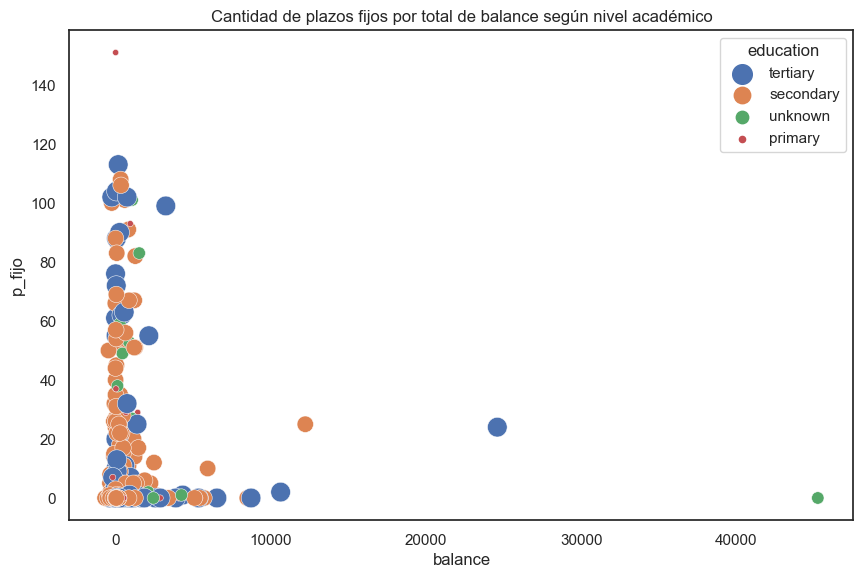

In [156]:
f,ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=days_group, x=df.balance, y='p_fijo',hue=df.education, size=df.education,sizes=(20, 200), legend="full").set(title='Cantidad de plazos fijos por total de balance según nivel académico')

[Text(0.5, 1.0, 'Distribución de la edad por estado marital')]

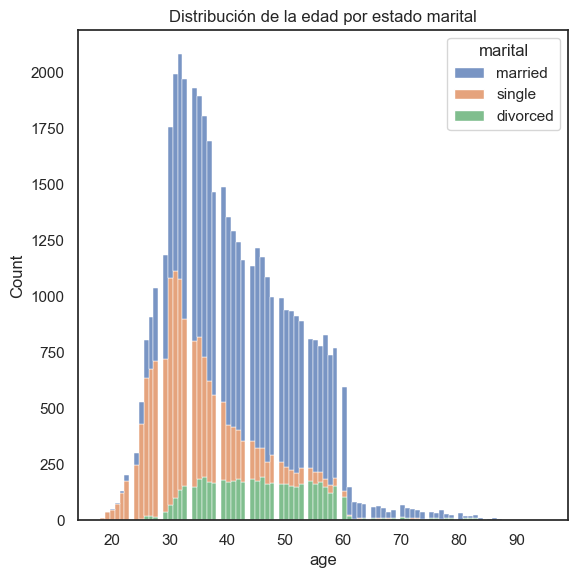

In [157]:
f,ax= plt.subplots(figsize=(5,5))
sns.histplot(data=df, x='age', hue='marital', multiple="stack").set(title="Distribución de la edad por estado marital")

Como ya sabemos que estado marital tiene mayor probabilidad de hacer un plazo fijo, podríamos definir la edad objetivo de las personas entre los 30 y los 60. Ya que la gran mayoría de personas está casada entre esas edades. Podríamos ajustar las campañas de marketing para este grupo de personas sabiendo que son las que mayor posibilidad de inversión pueden hacer.

In [158]:
df_renamed= pd.read_csv('bank-full.csv', sep=';')
df_renamed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


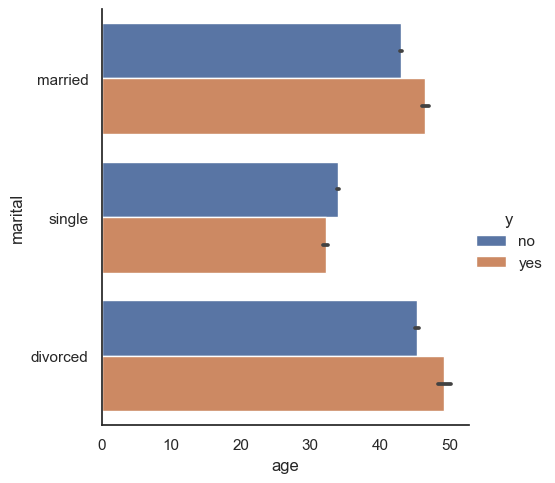

In [159]:
sns.catplot(x="age", y="marital", hue="y", kind="bar", data=df_renamed)

In [160]:
pivot_df = df.pivot_table(values='p_fijo', index='marital', columns='age', aggfunc='sum')
pivot_df

age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,88,89,90,92,93,94,95
marital,,,,,,,,,,,,,,,,,,,,,
divorced,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,...,1.0,1.0,1.0,NaN,0.0,2.0,NaN,NaN,0.0,1.0
married,NaN,NaN,1.0,1.0,0.0,2.0,10.0,14.0,13.0,29.0,...,3.0,2.0,2.0,0.0,0.0,NaN,2.0,2.0,NaN,0.0
single,7.0,11.0,14.0,21.0,40.0,42.0,58.0,99.0,121.0,110.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


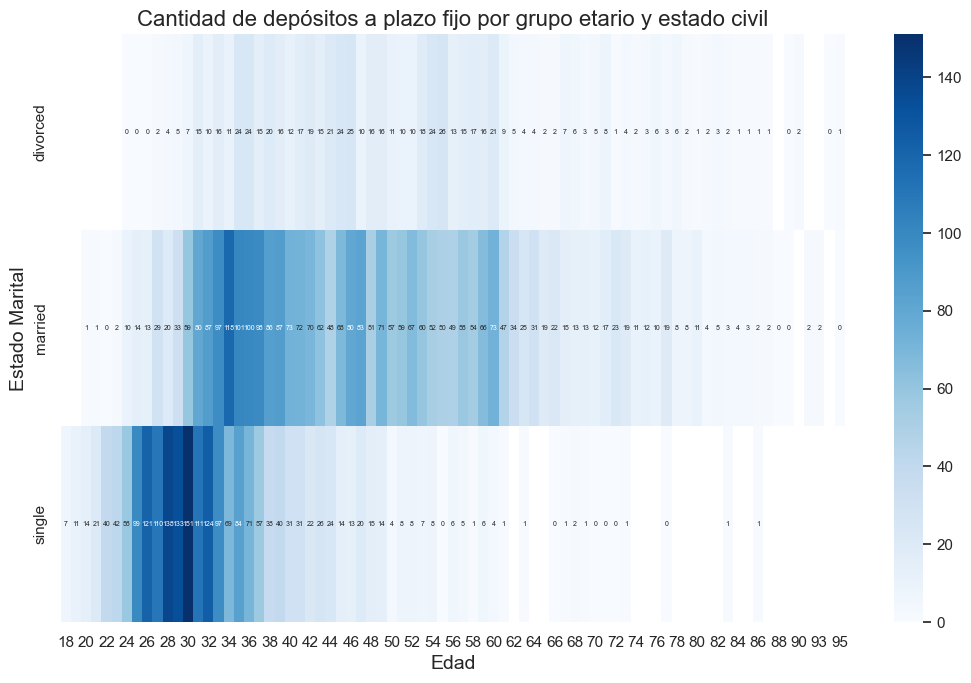

In [161]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(10,6))

# Crea un heatmap con Seaborn y ajusta el tamaño de la fuente de las etiquetas de datos
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='g', cbar=True, annot_kws={"fontsize":5})

# Añade etiquetas a los ejes y el título
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Estado Marital', fontsize=14)
plt.title('Cantidad de depósitos a plazo fijo por grupo etario y estado civil', fontsize=16)

# Muestra el gráfico
plt.show()

Aquí podemos ver específicamente que para solteros entre 25 y 32 años es lo más ótimo.

Para casados, entre los 31 y 42. 

Con esta información podemos ver que no es muy buena idea invertir por personas divorciadas.

# Entrega del 11/05/23: Cambios en los modelos para obtener mejores resultados

Vamos a hacer la prueba con 3 modelos de clasificación, KNeighborsClassifier, Support Vector Machines y RandomTree Classifier.

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [163]:
total = df.p_fijo.value_counts()[1] + df.p_fijo.value_counts()[0]
depositos = df.p_fijo.value_counts()[1]
no_depositos = df.p_fijo.value_counts()[0]
print('El porcentaje total de depositos corresponde a {:.2%} y el porcentaje total de no depostios corresponde al {:.2%}'.format(depositos/total, no_depositos/total))

El porcentaje total de depositos corresponde a 11.70% y el porcentaje total de no depostios corresponde al 88.30%


Al tener una base de datos totalmente desbalanceada debemos recurrir a nuevas formas de modelar la base de datos para procesamiento con algoritmos. También debemos ajustar que métricas utilizaremos para medir el rendimiento. Ya que estamos ante un situación que deseamos predecir una clase minoritaria con mayor precisión que la clase mayoritaria haremos uso de F1 Score y de la curva ROC. 

In [164]:
le = LabelEncoder() #Para poder tratar las variables categóricas
sc = StandardScaler()

In [165]:
df_encoded = df

In [166]:
df_encoded['education']= le.fit_transform(df_encoded['education'])
df_encoded['job']= le.fit_transform(df_encoded['job'])
df_encoded['marital']= le.fit_transform(df_encoded['marital'])
df_encoded['poutcome'] = le.fit_transform(df_encoded['poutcome'])
df_encoded['contact'] = le.fit_transform(df_encoded['contact'])

In [167]:
df_encoded['balance'] = sc.fit_transform(df_encoded['balance'].values.reshape(-1, 1))
df_encoded['duration'] = sc.fit_transform(df_encoded['duration'].values.reshape(-1, 1))

In [168]:
features= ['age', 'balance', 'education', 'job', 'marital', 'housing','loan', 'contact', 'duration']

X= df_encoded[features] #seleccionamos las variables que ayudarán a predecir y

y= df_encoded['p_fijo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

Para el modelo de KNeighborsClassifier vamos a utilizar la técnica del codo para ver para nuestro modelo cual es la mejor cantidad de vecinos cercanos, dependiendo de su tasa de error.

In [169]:
error_rate = []
# Puede tomar bastante tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Error mínimo de :- 0.11 en K = 31


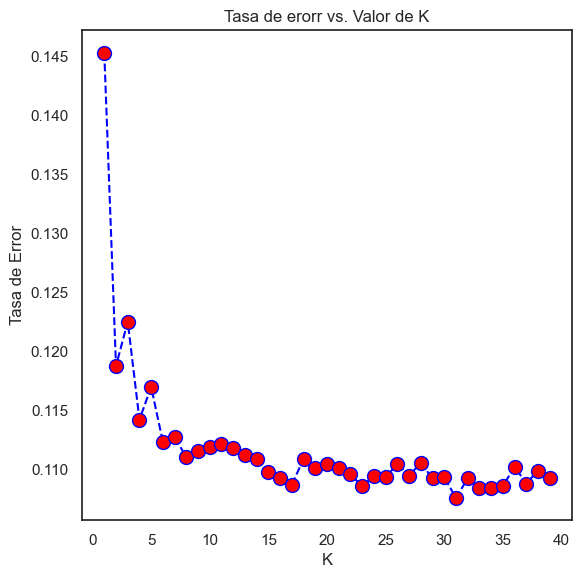

In [170]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Tasa de erorr vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')
req_k_value = error_rate.index(min(error_rate))+1
print("Error mínimo de :-",round(min(error_rate),2),"en K =",req_k_value)

In [171]:
knn = KNeighborsClassifier(n_neighbors=31, weights= 'uniform', algorithm= 'auto', metric='minkowski', p=2)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

> Reporte de clasificación de KNNClassifier

In [172]:
# Predicciones del knn sobre el conjunto de prueba
knn_y_pred = knn.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, knn_y_pred)

# Precisión del knn
precision = precision_score(y_test, knn_y_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, knn_y_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, knn_y_pred)

# Crear un dataframe con los resultados
metricas_df = pd.DataFrame({'Modelo': ["KNeighbors Classifier"] ,'Exactitud': [round(accuracy*100,2)], 'Precisión': [round(precision*100,2)], 'Sensibilidad': [round(recall*100,2)], 'Especificidad': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)]})

# Mostrar el dataframe con los resultados
metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,89.24,65.44,16.84,98.82,26.79


> Reporte de clasificación de KNNClassifier con Cross Validation

In [173]:
from sklearn.model_selection import cross_val_predict

knn_y_cv_pred = cross_val_predict(knn, X, y, cv=31) #Puede demorar un poco

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y, knn_y_cv_pred)

# Precisión del knn
precision = precision_score(y, knn_y_cv_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y, knn_y_cv_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y, knn_y_cv_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y, knn_y_cv_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["KNeighbors Classifier CV"] ,
                                'Exactitud': [round(accuracy*100,2)],
                                'Precisión': [round(precision*100,2)],
                                'Sensibilidad': [round(recall*100,2)],
                                'Especificidad': [round(specificity*100,2)],
                                'F1 Score': [round(f1*100,2)]})

metricas_df = metricas_df.append(nuevas_metricas, ignore_index=True)

metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,89.24,65.44,16.84,98.82,26.79
1,KNeighbors Classifier CV,88.29,49.79,16.00,97.86,24.21


In [174]:
scores = cross_val_score(knn, X, y, cv=31)

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.89033585 0.88827964 0.89444825 0.91089788 0.91158328 0.90678547
 0.89718986 0.90678547 0.91089788 0.89102125 0.88759424 0.89718986
 0.87731323 0.89231824 0.8957476  0.89026063 0.88203018 0.88271605
 0.88888889 0.87379973 0.88340192 0.87517147 0.88820302 0.8744856
 0.87997257 0.87860082 0.89163237 0.88477366 0.88751715 0.75102881
 0.79766804]
Average Accuracy: 0.8828560927001539


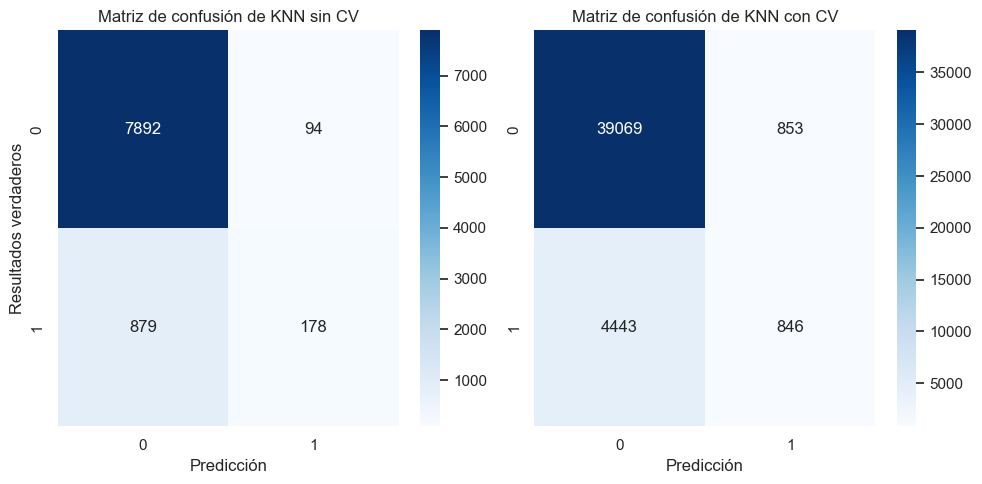

In [175]:
# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Graficar primer subplot
cm = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axs[0])
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Resultados verdaderos")
axs[0].set_title("Matriz de confusión de KNN sin CV")

# Graficar segundo subplot
cm = confusion_matrix(y, knn_y_cv_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axs[1])
axs[1].set_xlabel("Predicción")
axs[1].set_title("Matriz de confusión de KNN con CV")

# Ajustar los subplots para que se ajusten a la figura
plt.tight_layout()

# Mostrar la figura
plt.show()


Luego de varios intentos por mejorar el algoritmo pudimos lograr un F1 score de 0.34 para los resultados positivos

Probemos con DecisionTreeClassifier 

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

t_clf = DecisionTreeClassifier(class_weight= "balanced" , min_samples_split= 5, criterion='entropy', max_depth=8, random_state=123, splitter='best')
t_clf.fit(X_train, y_train)
y_t_clf_pred = t_clf.predict(X_test)

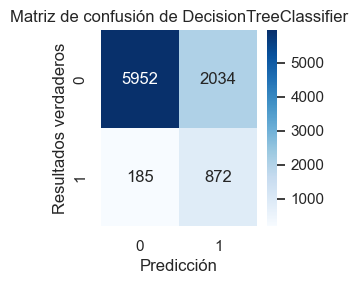

In [178]:
cm = confusion_matrix(y_test, y_t_clf_pred)
ax,fig= plt.subplots(figsize=(2,2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión de DecisionTreeClassifier")

# Show the plot
plt.show()

In [179]:
# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, y_t_clf_pred)

# Precisión del knn
precision = precision_score(y_test, y_t_clf_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, y_t_clf_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, y_t_clf_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, y_t_clf_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Decision Tree Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas_df = metricas_df.append(nuevas_metricas, ignore_index=True)

metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,89.24,65.44,16.84,98.82,26.79
1,KNeighbors Classifier CV,88.29,49.79,16.00,97.86,24.21
2,Decision Tree Classifier,75.46,30.01,82.50,74.53,44.01


In [180]:
y_train_pred = t_clf.predict(X_train)
y_test_pred = t_clf.predict(X_test)

In [181]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

% de aciertos sobre el set de entrenamiento: 0.7617507188675072


In [182]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7546168306977773


DecisionTreeClassifier también tiene overfitting aunque ha hecho un mejor trabajo en reconocer verdaderos positivos en comparación a KNN Classifier

Veamos ahora con RandomForestClassifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight= "balanced", max_depth= 7, n_estimators=15, max_features= 7, criterion='entropy', warm_start=True, random_state=123)

rfc = rfc.fit(X_train,y_train) # fit model to training datset


In [184]:
rfc_pred = rfc.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, rfc_pred)

# Precisión del knn
precision = precision_score(y_test, rfc_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, rfc_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas_df = metricas_df.append(nuevas_metricas, ignore_index=True)

metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,89.24,65.44,16.84,98.82,26.79
1,KNeighbors Classifier CV,88.29,49.79,16.00,97.86,24.21
2,Decision Tree Classifier,75.46,30.01,82.50,74.53,44.01
3,Random Forest Classifier,78.76,33.36,81.93,78.34,47.41


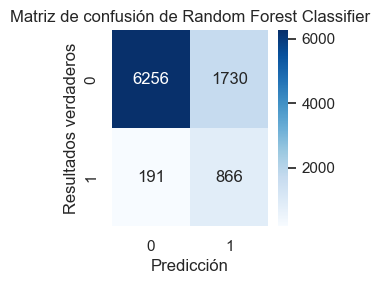

In [185]:
cm = confusion_matrix(y_test, rfc_pred)
ax,fig= plt.subplots(figsize=(2,2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels to the plot
plt.xlabel("Predicción")
plt.ylabel("Resultados verdaderos")
plt.title("Matriz de confusión de Random Forest Classifier")

# Show the plot
plt.show()

Ya hemos llegado a un mejor nivel de reconocimiento de verdaderos positivos, ¡vamos mejorando!

Vamos a medir el rendimiento de nuestros modelos de clasificación:

In [186]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr = lr.fit(X_train,y_train) 

lr_pred = lr.predict(X_test)


In [187]:
# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, lr_pred)

# Precisión del knn
precision = precision_score(y_test, lr_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, lr_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, lr_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Logistic Regression"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas_df = metricas_df.append(nuevas_metricas, ignore_index=True)

Creamos una función para obtener de una lista de modelos su roc_auc

In [188]:
models= [knn, t_clf, lr,rfc]

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X, y): #Toma los modelos ya fiteados
    fig, ax = plt.subplots(figsize=(5,5))
    for model in models:
        y_score = model.predict_proba(X)[:,1]  
        fpr, tpr, thresholds = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')
    plt.show()


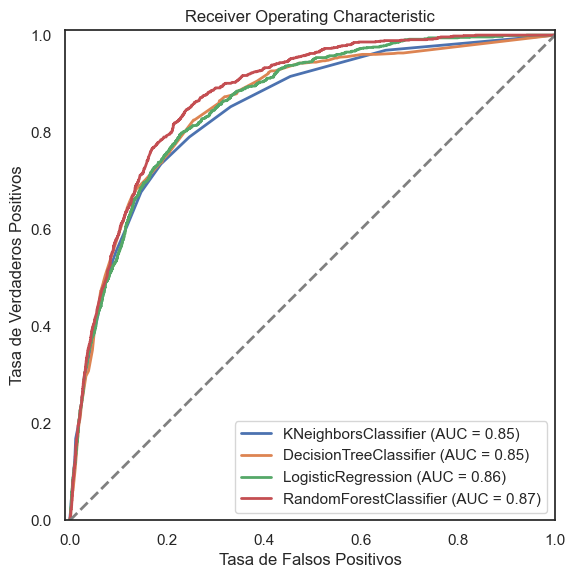

In [190]:
plot_roc_curves(models,X_test,y_test)

Veamos en completo el rendimiento de nuestros modelos de clasificación

In [191]:
metricas_df.set_index("Modelo", inplace=True)
metricas_df

,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
Modelo,,,,,
KNeighbors Classifier,89.24,65.44,16.84,98.82,26.79
KNeighbors Classifier CV,88.29,49.79,16.00,97.86,24.21
Decision Tree Classifier,75.46,30.01,82.50,74.53,44.01
Random Forest Classifier,78.76,33.36,81.93,78.34,47.41
Logistic Regression,88.99,58.84,19.21,98.22,28.96


Decision Tree Classifier fue el que mejor performance tuvo. De todas formas los resultados todavía no son lo suficientemente satisfactorios para poder concluir que nuestros modelos están prediciendo con exactitud cuando una persona es probable que haga un depósito.

# Desafío 18/05/23 Feature Engineering y entrenamiento de modelos

Creamos una variable sintética con la edad. También vamos a utilizar la variable sintética debt_status, que trabajamos anteriormente.

In [992]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [993]:
edades_categorias = [18,45,64,96]
categorias = ["PEA joven", "PEA adulta", "Retirados"]
df['edad_categoria'] = pd.cut(df['age'], bins=edades_categorias, labels=categorias, right=False)

In [994]:
df.groupby('age').first()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo,debt_status,edad_categoria,balance_categoria
age,,,,,,,,,,,,,,,,,,,
18,8,2,0,0,0.191060,0,0,1,10,aug,-0.528737,3,-1,0,3,0,1,PEA joven,3
19,8,2,3,0,-0.063478,0,0,0,6,feb,0.795406,18,-1,0,3,0,1,PEA joven,3
20,1,2,1,0,-0.405051,1,1,2,13,may,-0.264685,1,-1,0,3,0,0,PEA joven,3
21,8,2,1,0,-0.445449,0,0,2,9,may,1.412822,1,-1,0,3,0,1,PEA joven,3
22,1,2,1,0,-0.447419,1,0,2,5,may,-0.307400,2,-1,0,3,0,2,PEA joven,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,5,0,1,0,-0.447091,0,0,0,13,feb,-0.412244,3,-1,0,3,1,1,Retirados,3
92,5,1,3,0,-0.192881,0,0,0,22,oct,0.212938,3,-1,0,3,1,1,Retirados,3
93,5,1,3,0,-0.192881,0,0,0,22,jul,2.337004,2,177,7,2,1,1,Retirados,3


In [995]:
df_challenge = pd.read_csv("bank-full.csv", sep= ";")
df_challenge.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [996]:
df_challenge.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [997]:
balances = [-float("inf"), 0,25000, 75000, float('inf')]
balances_categoria = ["endeudado", "moderado", "ahorrista", "acaudalado"]
df['balance_categoria'] = pd.cut(df_challenge['balance'], bins=balances, labels=balances_categoria, right=False)

In [998]:
df.balance_categoria.value_counts()

moderado      41348
endeudado      3766
ahorrista        93
acaudalado        4
Name: balance_categoria, dtype: int64

In [999]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'p_fijo', 'debt_status', 'edad_categoria',
       'balance_categoria'],
      dtype='object')

In [1000]:
variables_sinteticas = pd.DataFrame(df[["debt_status", "edad_categoria", "balance_categoria"]])
variables_sinteticas.head()

,debt_status,edad_categoria,balance_categoria
0,2,PEA adulta,moderado
1,2,PEA joven,moderado
2,0,PEA joven,moderado
3,2,PEA adulta,moderado
4,1,PEA joven,moderado


Estas son nuestras variables sintéticas, podemos probar con un encoder para que los algoritmos hagan un mejor procesamiento de estas nuevas variables. 

In [1001]:
df_encoded.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo,debt_status,edad_categoria,balance_categoria
0,58,4,1,2,0,0.256419,1,0,2,5,may,0.011016,1,-1,0,3,0,2,PEA adulta,moderado
1,44,9,2,1,0,-0.437895,1,0,2,5,may,-0.416127,1,-1,0,3,0,2,PEA joven,moderado
2,33,2,1,1,0,-0.446762,1,1,2,5,may,-0.707361,1,-1,0,3,0,0,PEA joven,moderado
3,47,1,1,3,0,0.047205,1,0,2,5,may,-0.645231,1,-1,0,3,0,2,PEA adulta,moderado


In [1002]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_debt = ohe.fit_transform(df_encoded['debt_status'].array.reshape(-1,1))

encoded_debt = encoded_debt.toarray()

encoded_debt_df = pd.DataFrame(encoded_debt)

encoded_debt_df.rename(columns={0:"only_housing", 2: "no_debts"}, inplace=True)

encoded_debt_df.drop(columns=[1,3], inplace=True)
encoded_debt_df



,only_housing,no_debts
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
45206,0.0,0.0
45207,0.0,0.0
45208,0.0,0.0
45209,0.0,0.0


In [1003]:
encoded_edad = ohe.fit_transform(df_encoded['edad_categoria'].array.reshape(-1,1))
encoded_edad = encoded_edad.toarray()
encoded_edad_df = pd.DataFrame(encoded_edad)
encoded_edad_df.rename(columns={0:"PEA adulta", 1: "PEA joven"}, inplace=True)
encoded_edad_df.drop(columns=2, inplace=True)
encoded_edad_df

,PEA adulta,PEA joven
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
45206,1.0,0.0
45207,0.0,0.0
45208,0.0,0.0
45209,1.0,0.0


In [1004]:
df_encoded.balance_categoria.value_counts()


moderado      41348
endeudado      3766
ahorrista        93
acaudalado        4
Name: balance_categoria, dtype: int64

In [1005]:
encoded_balance = ohe.fit_transform(df_encoded['balance_categoria'].array.reshape(-1,1))
encoded_balance = encoded_balance.toarray()
encoded_balance_df = pd.DataFrame(encoded_balance)
encoded_balance_df.rename(columns={0 : "moderado", 1 : "endeudado", 2 : "ahorrista", 3 : "acaudalado" }, inplace=True)
encoded_balance_df
encoded_balance_df.drop(columns={"ahorrista", "acaudalado"}, inplace=True)
encoded_balance_df

,moderado,endeudado
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
45206,0.0,0.0
45207,0.0,0.0
45208,0.0,0.0
45209,0.0,0.0


In [1006]:
df_encoded2 = df_encoded.drop(columns=["p_fijo", "edad_categoria", "balance_categoria"])
df_encoded2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,debt_status
0,58,4,1,2,0,0.256419,1,0,2,5,may,0.011016,1,-1,0,3,2
1,44,9,2,1,0,-0.437895,1,0,2,5,may,-0.416127,1,-1,0,3,2
2,33,2,1,1,0,-0.446762,1,1,2,5,may,-0.707361,1,-1,0,3,0
3,47,1,1,3,0,0.047205,1,0,2,5,may,-0.645231,1,-1,0,3,2
4,33,11,2,3,0,-0.447091,0,0,2,5,may,-0.233620,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,-0.176460,0,0,0,17,nov,2.791329,3,-1,0,3,1
45207,71,5,0,0,0,0.120447,0,0,0,17,nov,0.768224,2,-1,0,3,1
45208,72,5,1,1,0,1.429593,0,0,0,17,nov,3.373797,5,184,3,2,1
45209,57,1,1,1,0,-0.228024,0,0,1,17,nov,0.970146,4,-1,0,3,1


In [1007]:
df_encoded2 = pd.concat([df_encoded2,encoded_debt_df, encoded_edad_df,encoded_balance_df ], axis=1)
df_encoded2

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,debt_status,only_housing,no_debts,PEA adulta,PEA joven,moderado,endeudado
0,58,4,1,2,0,0.256419,1,0,2,5,...,-1,0,3,2,0.0,1.0,1.0,0.0,0.0,0.0
1,44,9,2,1,0,-0.437895,1,0,2,5,...,-1,0,3,2,0.0,1.0,0.0,1.0,0.0,0.0
2,33,2,1,1,0,-0.446762,1,1,2,5,...,-1,0,3,0,1.0,0.0,0.0,1.0,0.0,0.0
3,47,1,1,3,0,0.047205,1,0,2,5,...,-1,0,3,2,0.0,1.0,1.0,0.0,0.0,0.0
4,33,11,2,3,0,-0.447091,0,0,2,5,...,-1,0,3,1,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,-0.176460,0,0,0,17,...,-1,0,3,1,0.0,0.0,1.0,0.0,0.0,0.0
45207,71,5,0,0,0,0.120447,0,0,0,17,...,-1,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0
45208,72,5,1,1,0,1.429593,0,0,0,17,...,184,3,2,1,0.0,0.0,0.0,0.0,0.0,0.0
45209,57,1,1,1,0,-0.228024,0,0,1,17,...,-1,0,3,1,0.0,0.0,1.0,0.0,0.0,0.0


In [1008]:
df_encoded2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'debt_status', 'only_housing', 'no_debts',
       'PEA adulta', 'PEA joven', 'moderado', 'endeudado'],
      dtype='object')

In [1009]:
X= df_encoded2.drop(columns=["age", "balance", "loan", "housing", "default","month", "contact", "day", "campaign", "pdays", "previous", "poutcome", "debt_status"])
y= df_encoded["p_fijo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

In [1010]:
error_rate = []
# Puede tomar más de 5 minutos en terminar la ejecución
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Error mínimo de :- 0.11 en K = 37


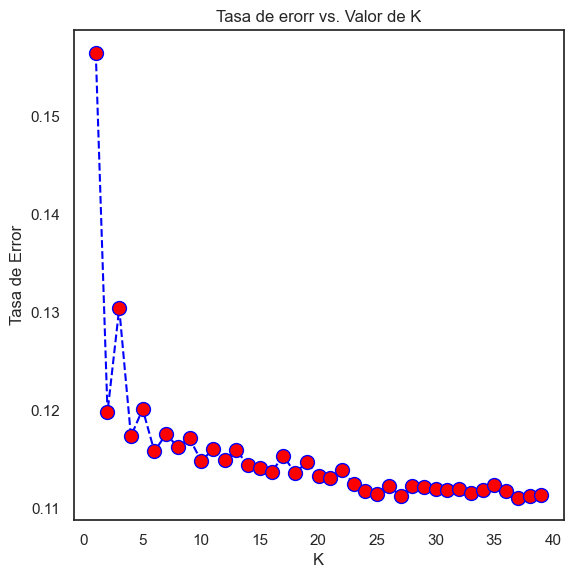

In [1011]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Tasa de erorr vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')
req_k_value = error_rate.index(min(error_rate))+1
print("Error mínimo de :-",round(min(error_rate),2),"en K =",req_k_value)

In [1012]:
knn = KNeighborsClassifier(n_neighbors=37, weights= 'uniform', algorithm= 'ball_tree', metric='minkowski', p=2)

knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

In [1013]:
# Predicciones del knn sobre el conjunto de prueba
knn_y_pred = knn.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, knn_y_pred)

# Precisión del knn
precision = precision_score(y_test, knn_y_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, knn_y_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, knn_y_pred)

# Crear un dataframe con los resultados
metricas2_df = pd.DataFrame({'Modelo': ["KNeighbors Classifier"] ,'Exactitud': [round(accuracy*100,2)], 'Precisión': [round(precision*100,2)], 'Sensibilidad': [round(recall*100,2)], 'Especificidad': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)]})

# Mostrar el dataframe con los resultados
metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.9,57.26,19.77,98.05,29.4


In [1014]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(C=1, kernel= "rbf", class_weight= "balanced", gamma="scale"))

clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, class_weight='balanced'))])

In [1015]:
clf_pred = clf.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, clf_pred)

# Precisión
precision = precision_score(y_test, clf_pred)

# Sensibilidad (recall) 
recall = recall_score(y_test, clf_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, clf_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, clf_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["SVC"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63


In [1016]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

t_clf = DecisionTreeClassifier(class_weight= "balanced" , min_samples_split= 6, criterion='entropy', max_depth=10, random_state=123, splitter='best')
t_clf.fit(X_train, y_train)
y_t_clf_pred = t_clf.predict(X_test)

In [1017]:
# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, y_t_clf_pred)

# Precisión
precision = precision_score(y_test, y_t_clf_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, y_t_clf_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_t_clf_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_t_clf_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Decision Tree Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79


In [1018]:
k = 100
scores = cross_val_score(t_clf, X, y, cv=k, scoring='recall')

print("Cross-Validation Scores:", scores)
print("Average Recall:", scores.mean())


Cross-Validation Scores: [0.9245283  0.86792453 0.90566038 0.88679245 0.90566038 0.86792453
 0.83018868 0.96226415 0.86792453 0.98113208 0.90566038 0.94230769
 0.90384615 0.92307692 0.90384615 0.98076923 0.96153846 0.94230769
 0.98076923 0.92307692 0.88461538 0.75       0.41509434 0.9245283
 0.83018868 0.90566038 0.8490566  0.94339623 0.79245283 0.8490566
 0.50943396 0.56603774 0.49056604 0.41509434 0.73584906 0.73584906
 0.62264151 0.73584906 0.64150943 0.58490566 0.73584906 0.88679245
 0.86792453 0.77358491 0.81132075 0.90566038 0.79245283 0.79245283
 0.81132075 0.77358491 0.73584906 0.69811321 0.66037736 0.62264151
 0.66037736 0.60377358 0.71698113 0.81132075 0.83018868 0.79245283
 0.66037736 0.77358491 0.71698113 0.54716981 0.67924528 0.56603774
 0.69811321 0.64150943 0.67924528 0.67924528 0.60377358 0.56603774
 0.79245283 0.79245283 0.8490566  0.79245283 0.67924528 0.60377358
 0.67924528 0.79245283 0.77358491 0.77358491 0.62264151 0.58490566
 0.81132075 0.77358491 0.79245283 0.773

In [1019]:
cv_t_clf = cross_val_predict(t_clf, X, y, cv=k)

In [1020]:

# Exactitud (accuracy) 
accuracy = accuracy_score(y, cv_t_clf)

# Precisión
precision = precision_score(y, cv_t_clf)

# Sensibilidad (recall)
recall = recall_score(y, cv_t_clf)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, cv_t_clf).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, cv_t_clf)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Decision Tree Clasif."] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79
3,Cross Validated Decision Tree Clasif.,74.97,28.68,76.65,74.75,41.74


In [1021]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr = lr.fit(X_train,y_train) 

lr_pred = lr.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, lr_pred)

# Precisión del knn
precision = precision_score(y_test, lr_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, lr_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, lr_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Logistic Regression"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)
metricas2_df




,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79
3,Cross Validated Decision Tree Clasif.,74.97,28.68,76.65,74.75,41.74
4,Logistic Regression,88.99,59.00,18.92,98.26,28.65


In [1022]:
k = 15
scores = cross_val_score(lr, X, y, cv=k, scoring='recall')

print("Cross-Validation Scores:", scores)
print("Average Recall:", scores.mean())


Cross-Validation Scores: [0.30594901 0.375      0.40909091 0.27840909 0.23295455 0.15625
 0.13352273 0.11614731 0.08498584 0.07932011 0.09631728 0.11898017
 0.08215297 0.11048159 0.1898017 ]
Average Recall: 0.1846242166709589


In [1023]:
lr_pred = cross_val_predict(t_clf, X, y, cv=k)

# Exactitud (accuracy) 
accuracy = accuracy_score(y, lr_pred)

# Precisión
precision = precision_score(y, lr_pred)

# Sensibilidad (recall)
recall = recall_score(y, lr_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, lr_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, cv_t_clf)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Logistic Reg."] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79
3,Cross Validated Decision Tree Clasif.,74.97,28.68,76.65,74.75,41.74
4,Logistic Regression,88.99,59.00,18.92,98.26,28.65
5,Cross Validated Logistic Reg.,74.44,28.20,76.67,74.14,41.74


In [1024]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight= "balanced", max_depth= 7, n_estimators=15, max_features= 7, criterion='entropy', warm_start=True, random_state=123)

rfc = rfc.fit(X_train,y_train) # fit model to training datset

rfc_pred = rfc.predict(X_test)


# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, rfc_pred)

# Precisión del knn
precision = precision_score(y_test, rfc_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, rfc_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79
3,Cross Validated Decision Tree Clasif.,74.97,28.68,76.65,74.75,41.74
4,Logistic Regression,88.99,59.00,18.92,98.26,28.65
5,Cross Validated Logistic Reg.,74.44,28.20,76.67,74.14,41.74
6,Random Forest Classifier,76.37,30.26,78.33,76.11,43.66


In [1025]:
k = 15
scores = cross_val_score(rfc, X, y, cv=k, scoring='recall')

rfc_pred = cross_val_predict(rfc, X, y, cv=k)

# Exactitud (accuracy) 
accuracy = accuracy_score(y, rfc_pred)

# Precisión
precision = precision_score(y, rfc_pred)

# Sensibilidad (recall)
recall = recall_score(y, rfc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,88.90,57.26,19.77,98.05,29.40
1,SVC,77.61,31.38,77.20,77.66,44.63
2,Decision Tree Classifier,74.95,28.69,76.92,74.69,41.79
3,Cross Validated Decision Tree Clasif.,74.97,28.68,76.65,74.75,41.74
4,Logistic Regression,88.99,59.00,18.92,98.26,28.65
5,Cross Validated Logistic Reg.,74.44,28.20,76.67,74.14,41.74
6,Random Forest Classifier,76.37,30.26,78.33,76.11,43.66
7,Cross Validated Random Forest Classifier,74.93,29.01,78.99,74.39,42.43


In [1026]:
models= [knn, t_clf, lr,rfc]


In [1027]:
def plot_roc_curves(models, X, y): #Toma los modelos ya fiteados
    fig, ax = plt.subplots(figsize=(5,5))
    for model in models:
        y_score = model.predict_proba(X)[:,1]  
        fpr, tpr, thresholds = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')
    plt.show()


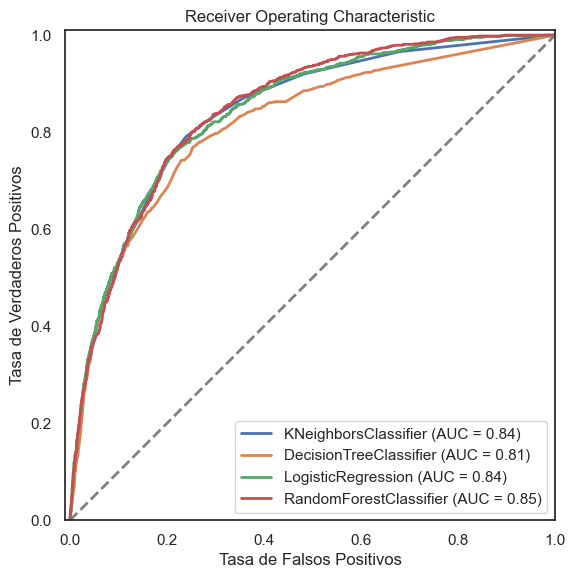

In [1028]:
plot_roc_curves(models,X_test,y_test)

## Voy a probar una última combinación con los dos insights obtenidos anteriormente

In [1029]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,p_fijo,debt_status,edad_categoria,balance_categoria
0,58,4,1,2,0,0.256419,1,0,2,5,may,0.011016,1,-1,0,3,0,2,PEA adulta,moderado
1,44,9,2,1,0,-0.437895,1,0,2,5,may,-0.416127,1,-1,0,3,0,2,PEA joven,moderado
2,33,2,1,1,0,-0.446762,1,1,2,5,may,-0.707361,1,-1,0,3,0,0,PEA joven,moderado
3,47,1,1,3,0,0.047205,1,0,2,5,may,-0.645231,1,-1,0,3,0,2,PEA adulta,moderado
4,33,11,2,3,0,-0.447091,0,0,2,5,may,-0.233620,1,-1,0,3,0,1,PEA joven,moderado


In [1030]:
df_encoded['debt_status']= le.fit_transform(df_encoded['debt_status'])
df_encoded['edad_categoria']= le.fit_transform(df_encoded['edad_categoria'])
df_encoded['balance_categoria']= le.fit_transform(df_encoded['balance_categoria'])

In [1031]:
features= ['edad_categoria', 'balance_categoria', 'education', 'job', 'marital', 'housing','loan', 'contact', 'duration', "debt_status"]

X= df_encoded[features] #seleccionamos las variables que ayudarán a predecir y

y= df_encoded['p_fijo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

In [1032]:
error_rate = []
# Puede tomar bastante tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Error mínimo de :- 0.11 en K = 39


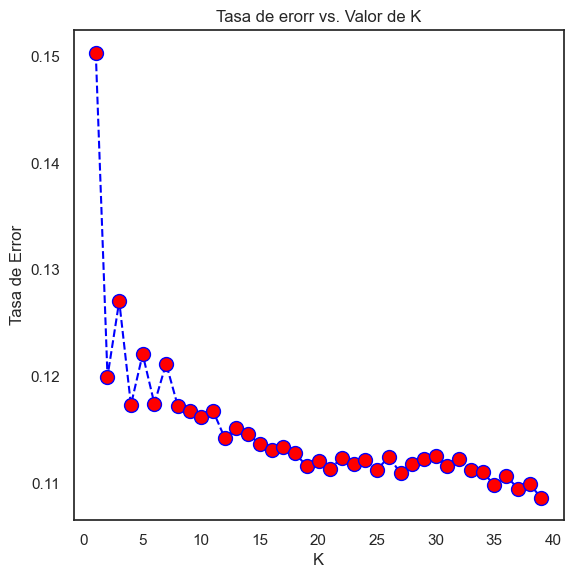

In [1033]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Tasa de erorr vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')
req_k_value = error_rate.index(min(error_rate))+1
print("Error mínimo de :-",round(min(error_rate),2),"en K =",req_k_value)

In [1034]:
knn = KNeighborsClassifier(n_neighbors=39, weights= 'distance', algorithm= 'kd_tree', metric='minkowski', p=2)

knn.fit(X_train, y_train)

# Predicciones del knn sobre el conjunto de prueba
knn_y_pred = knn.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, knn_y_pred)

# Precisión del knn
precision = precision_score(y_test, knn_y_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, knn_y_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, knn_y_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, knn_y_pred)

# Crear un dataframe con los resultados
metricas2_df = pd.DataFrame({'Modelo': ["KNeighbors Classifier"] ,'Exactitud': [round(accuracy*100,2)], 'Precisión': [round(precision*100,2)], 'Sensibilidad': [round(recall*100,2)], 'Especificidad': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)]})

# Mostrar el dataframe con los resultados
metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.1,95.57,34.78


In [1035]:
clf = make_pipeline(StandardScaler(), SVC(C=1, kernel= "rbf", class_weight= "balanced", gamma="scale"))

clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, clf_pred)

# Precisión
precision = precision_score(y_test, clf_pred)

# Sensibilidad (recall) 
recall = recall_score(y_test, clf_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, clf_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, clf_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["SVC"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26


In [1036]:
t_clf = DecisionTreeClassifier(class_weight= "balanced" , min_samples_split= 7, criterion='entropy', max_depth=9, random_state=123, splitter='best')
t_clf.fit(X_train, y_train)
y_t_clf_pred = t_clf.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, y_t_clf_pred)

# Precisión
precision = precision_score(y_test, y_t_clf_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, y_t_clf_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_t_clf_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y_test, y_t_clf_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Decision Tree Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13


In [1037]:
k = 100
scores = cross_val_score(t_clf, X, y, cv=k, scoring='recall')

cv_t_clf = cross_val_predict(t_clf, X, y, cv=k)


# Exactitud (accuracy) 
accuracy = accuracy_score(y, cv_t_clf)

# Precisión
precision = precision_score(y, cv_t_clf)

# Sensibilidad (recall)
recall = recall_score(y, cv_t_clf)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, cv_t_clf).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, cv_t_clf)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Decision Tree Clasif."] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54


In [1038]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr = lr.fit(X_train,y_train) 

lr_pred = lr.predict(X_test)

# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, lr_pred)

# Precisión del knn
precision = precision_score(y_test, lr_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, lr_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, lr_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, lr_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Logistic Regression"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)
metricas2_df


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63


In [1039]:
k = 100
scores = cross_val_score(lr, X, y, cv=k, scoring='recall')

lr_pred = cross_val_predict(t_clf, X, y, cv=k)

# Exactitud (accuracy) 
accuracy = accuracy_score(y, lr_pred)

# Precisión
precision = precision_score(y, lr_pred)

# Sensibilidad (recall)
recall = recall_score(y, lr_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, lr_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, cv_t_clf)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Logistic Reg."] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63
5,Cross Validated Logistic Reg.,77.35,31.68,80.96,76.87,45.54


In [1040]:
rfc = RandomForestClassifier(class_weight= "balanced", max_depth= 7, n_estimators=15, max_features= 7, criterion='entropy', warm_start=True, random_state=123)

rfc = rfc.fit(X_train,y_train) # fit model to training datset

rfc_pred = rfc.predict(X_test)


# Exactitud (accuracy) del knn
accuracy = accuracy_score(y_test, rfc_pred)

# Precisión del knn
precision = precision_score(y_test, rfc_pred)

# Sensibilidad (recall) del knn
recall = recall_score(y_test, rfc_pred)

# Especificidad del knn
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score del knn
f1 = f1_score(y_test, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63
5,Cross Validated Logistic Reg.,77.35,31.68,80.96,76.87,45.54
6,Random Forest Classifier,78.25,32.63,80.89,77.90,46.51


In [1041]:
k = 100
scores = cross_val_score(rfc, X, y, cv=k, scoring='recall')

rfc_pred = cross_val_predict(rfc, X, y, cv=k)

# Exactitud (accuracy) 
accuracy = accuracy_score(y, rfc_pred)

# Precisión
precision = precision_score(y, rfc_pred)

# Sensibilidad (recall)
recall = recall_score(y, rfc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63
5,Cross Validated Logistic Reg.,77.35,31.68,80.96,76.87,45.54
6,Random Forest Classifier,78.25,32.63,80.89,77.90,46.51
7,Cross Validated Random Forest Classifier,77.49,32.02,82.23,76.87,46.09


In [1042]:
models= [knn, t_clf, lr,rfc]

In [1043]:
def plot_roc_curves(models, X, y): #Toma los modelos ya fiteados
    fig, ax = plt.subplots(figsize=(5,5))
    for model in models:
        y_score = model.predict_proba(X)[:,1]  
        fpr, tpr, thresholds = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')
    plt.show()

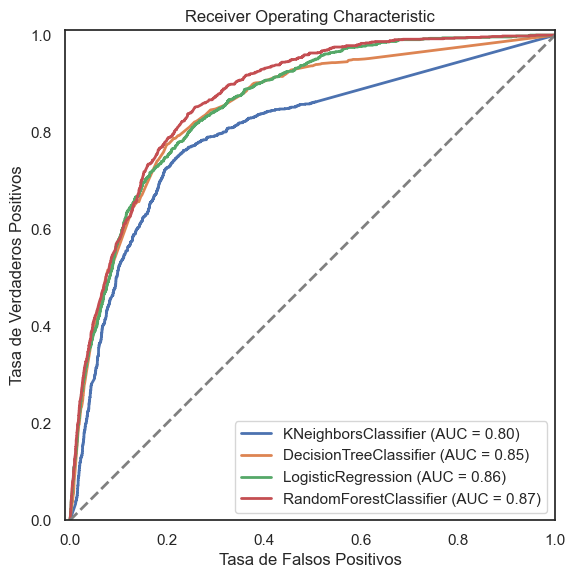

In [1044]:
plot_roc_curves(models,X_test,y_test)

Y así es como SVC y Random Forest han quedado empatados en cuanto a la curva ROC (AUC).

Probemos con PCA. Esto puede ayudarnos a quitar features que no estén ayudando:

In [1045]:
features= ['edad_categoria', 'balance_categoria', 'education', 'job', 'marital', 'housing','loan', 'contact', 'duration', "debt_status"]

X= df_encoded[features] #seleccionamos las variables que ayudarán a predecir y

y= df_encoded['p_fijo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123) 

In [1046]:
X

,edad_categoria,balance_categoria,education,job,marital,housing,loan,contact,duration,debt_status
0,0,3,2,4,1,1,0,2,0.011016,2
1,1,3,1,9,2,1,0,2,-0.416127,2
2,1,3,1,2,1,1,1,2,-0.707361,0
3,0,3,3,1,1,1,0,2,-0.645231,2
4,1,3,3,11,2,0,0,2,-0.233620,1
...,...,...,...,...,...,...,...,...,...,...
45206,0,3,2,9,1,0,0,0,2.791329,1
45207,2,3,0,5,0,0,0,0,0.768224,1
45208,2,3,1,5,1,0,0,0,3.373797,1
45209,0,3,1,1,1,0,0,1,0.970146,1


In [1047]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_pca = pca.fit_transform(X)  # X es la matriz de características original

In [1048]:
print(pca.explained_variance_ratio_)

[0.72901443 0.06804076 0.05690702 0.03961513 0.03666781 0.0265139
 0.01600922 0.01312249 0.00865836 0.00545088]


In [1049]:
print(pca.singular_values_)

[696.87227077 212.89707526 194.70094212 162.44849298 156.28871154
 132.89906074 103.26905404  93.49605571  75.9456359   60.25850423]


In [1050]:
def evaluate_pca_model(X_train, X_test, y_train, y_test, n_components):
    # Crear el objeto PCA con el número de componentes especificado
    pca = PCA(n_components=n_components)
    
    # Ajustar y transformar los datos de entrenamiento
    X_train_pca = pca.fit_transform(X_train)
    
    # Transformar los datos de prueba
    X_test_pca = pca.transform(X_test)
    
    # Entrenar el modelo de clasificación (por ejemplo, RandomForestClassifier)
    model = RandomForestClassifier(class_weight= "balanced", max_depth= 7, n_estimators=15, criterion='entropy', warm_start=True, random_state=123)
    model.fit(X_train_pca, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test_pca)
    
    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    
    # Crear el dataframe con las métricas
    metricas = pd.DataFrame({
        'Modelo': ["Random Forest Classifier con {} PC".format(n_components)],
        'Exactitud': [round(accuracy*100, 2)],
        'Precisión': [round(precision*100, 2)],
        'Sensibilidad': [round(recall*100, 2)],
        'Especificidad': [round(specificity*100, 2)],
        'F1 Score': [round(f1*100, 2)]
    })
    
    return metricas


In [1051]:
n_components = 5  # Número de componentes principales
metricas_df = (evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23


In [1052]:
n_components = 4  # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23
0,Random Forest Classifier con 4 PC,78.48,32.95,81.27,78.11,46.89


In [1053]:
n_components = 3  # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23
0,Random Forest Classifier con 4 PC,78.48,32.95,81.27,78.11,46.89
0,Random Forest Classifier con 3 PC,76.55,30.97,81.93,75.83,44.95


In [1054]:
n_components = 2  # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23
0,Random Forest Classifier con 4 PC,78.48,32.95,81.27,78.11,46.89
0,Random Forest Classifier con 3 PC,76.55,30.97,81.93,75.83,44.95
0,Random Forest Classifier con 2 PC,76.49,30.34,78.05,76.28,43.70


In [1055]:
n_components = 1  # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23
0,Random Forest Classifier con 4 PC,78.48,32.95,81.27,78.11,46.89
0,Random Forest Classifier con 3 PC,76.55,30.97,81.93,75.83,44.95
0,Random Forest Classifier con 2 PC,76.49,30.34,78.05,76.28,43.70
0,Random Forest Classifier con 1 PC,67.82,21.15,64.24,68.29,31.82


Vemos que con el análisis de PCA el mejor número de componentes es con 3 componantes principales. Ya que de por sí el primer componente explica el 72% de la predicción.

In [1056]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA

def evaluate_pca_model(X_train, X_test, y_train, y_test, n_components):
    # Crear el objeto PCA con el número de componentes especificado
    pca = PCA(n_components=n_components)
    
    # Ajustar y transformar los datos de entrenamiento
    X_train_pca = pca.fit_transform(X_train)
    
    # Transformar los datos de prueba
    X_test_pca = pca.transform(X_test)
    
    # Entrenar el modelo de clasificación (por ejemplo, RandomForestClassifier)
    model = make_pipeline(StandardScaler(), SVC(C=1, kernel= "rbf", class_weight= "balanced", gamma="scale"))
    model.fit(X_train_pca, y_train)
    
    # Realizar predicciones en los datos de prueba
    y_pred = model.predict(X_test_pca)
    
    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    
    # Crear el dataframe con las métricas
    metricas = pd.DataFrame({
        'Modelo': ["SVC con {} PC".format(n_components)],
        'Exactitud': [round(accuracy*100, 2)],
        'Precisión': [round(precision*100, 2)],
        'Sensibilidad': [round(recall*100, 2)],
        'Especificidad': [round(specificity*100, 2)],
        'F1 Score': [round(f1*100, 2)]
    })
    
    return metricas


In [1057]:
n_components = 4  # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df

n_components = 3 # Número de componentes principales
metricas_df = metricas_df.append(evaluate_pca_model(X_train, X_test, y_train, y_test, n_components))
metricas_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,Random Forest Classifier con 5 PC,78.08,32.41,80.61,77.75,46.23
0,Random Forest Classifier con 4 PC,78.48,32.95,81.27,78.11,46.89
0,Random Forest Classifier con 3 PC,76.55,30.97,81.93,75.83,44.95
0,Random Forest Classifier con 2 PC,76.49,30.34,78.05,76.28,43.70
0,Random Forest Classifier con 1 PC,67.82,21.15,64.24,68.29,31.82
0,SVC con 4 PC,78.15,32.63,81.65,77.69,46.62
0,SVC con 3 PC,74.33,29.00,82.59,73.24,42.93


Podemos concluir que Random Forest Classifier está haciendo un muy buen trabajo en predecir los verdaderos positivos, pero también fue sorprendente la llegada del modelo de SVC tan alto en este último ciclo de entrenamiento y testeo. Lo que me queda claro es que probablemente la mejor opción para mejorar los níveles de predicción de los modelos es trabajar con muestreos que permitan equilibrar la clase minoritaria y así facilitarnos el trabajo y aumentar nuestro "Recall" y F1 Score, las métricas que nos están guíando en la dirección del algoritmo que mejor prediga los verdaderos positivos. 

Hasta ahora nuestro modelo con mayor puntaje en sensibilidad ha sido SVC con 3 Principal Components 

# Entrega del 30/05
### Vamos a balancear la base de datos a través de una técnica de submuestro y para aumentar la sensibilidad y F1 Score del modelo vamos a utilizar stratified K fold validation 

> Primero dividimos en un 70 / 30 al dataframe 

In [1058]:
X= df_encoded2.drop(columns=["age", "balance", "loan", "housing", "default","month", "contact", "day", "campaign", "pdays", "previous", "poutcome", "debt_status"])
y= df_encoded["p_fijo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

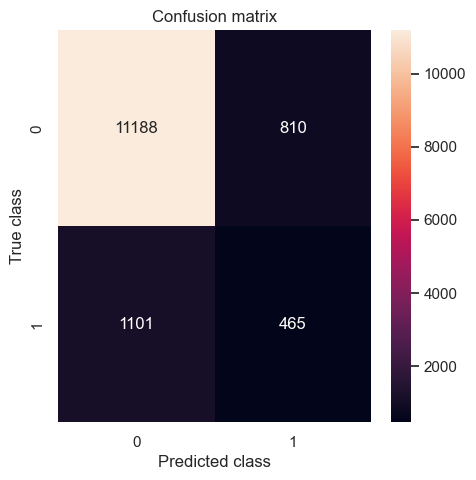

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11998
           1       0.36      0.30      0.33      1566

    accuracy                           0.86     13564
   macro avg       0.64      0.61      0.62     13564
weighted avg       0.85      0.86      0.85     13564



In [1059]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier()
    clf_base =  rfc.fit(X_train, y_train)
    return clf_base

#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

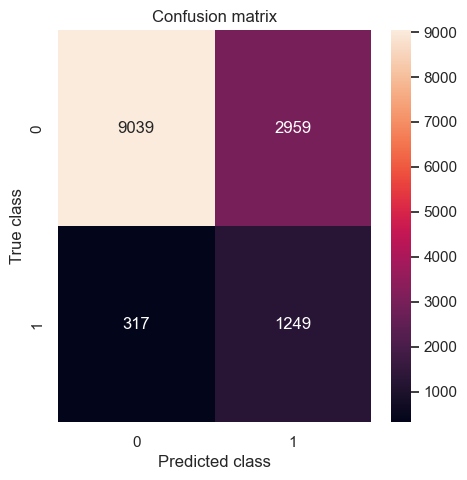

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     11998
           1       0.30      0.80      0.43      1566

    accuracy                           0.76     13564
   macro avg       0.63      0.78      0.64     13564
weighted avg       0.89      0.76      0.80     13564



In [1060]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(class_weight= "balanced", max_depth= 7, n_estimators=10, max_features= 12, criterion='gini', warm_start=True, random_state=123)
    rfc.fit(X_train, y_train)
    return rfc

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

> Veamos si en la división se sigue manteniendo nuestro ratio de 11% de variables minoritarias a predecir. Es decir, los 1. 

In [1061]:
matrix = y_train.value_counts()
matrix

0    27924
1     3723
Name: p_fijo, dtype: int64

In [1062]:
ceros = matrix[0]
unos = matrix[1]
total = ceros + unos
porcentaje = round((unos / total)*100, 2)
porcentaje

11.76

> Vemos que se sigue cumpliendo en nuestro dataset de training ahora vamos a hacer el oversampling

In [1063]:
def run_model(X_train, X_test, y_train, y_test):
    t_clf = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth= 2, random_state=123)
    t_clf =  t_clf.fit(X_train, y_train)
    return t_clf

Distribution before resampling Counter({0: 27924, 1: 3723})
Distribution after resampling Counter({0: 3723, 1: 3723})


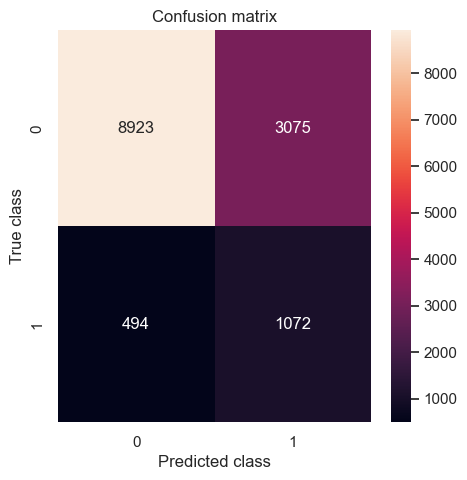

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11998
           1       0.26      0.68      0.38      1566

    accuracy                           0.74     13564
   macro avg       0.60      0.71      0.60     13564
weighted avg       0.87      0.74      0.78     13564



In [1064]:
from imblearn.under_sampling import NearMiss
from collections import Counter

us = NearMiss( n_neighbors=10, version=1, n_jobs= 6)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


In [1065]:
def run_model(X_train, X_test, y_train, y_test):
    t_clf = RandomForestClassifier(oob_score=True, n_jobs=3,class_weight="balanced", max_depth=2 ,n_estimators=1, criterion='entropy', warm_start=False, max_samples=78,random_state=123)
    t_clf =  t_clf.fit(X_train, y_train)
    return t_clf

Distribution before resampling Counter({0: 27924, 1: 3723})
Distribution after resampling Counter({0: 25307, 1: 25307})


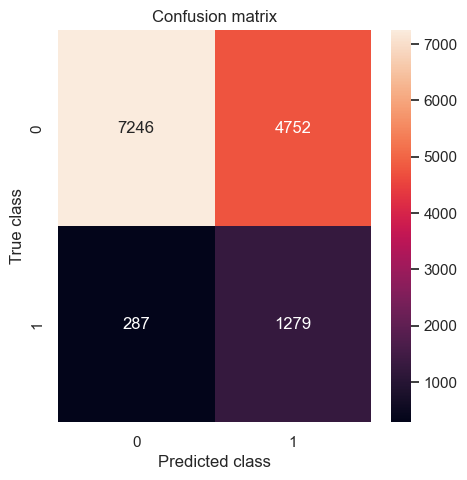

              precision    recall  f1-score   support

           0       0.96      0.60      0.74     11998
           1       0.21      0.82      0.34      1566

    accuracy                           0.63     13564
   macro avg       0.59      0.71      0.54     13564
weighted avg       0.88      0.63      0.70     13564



In [1066]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


In [1067]:
def run_model(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(oob_score=True, n_jobs=3,class_weight="balanced", max_depth=8 ,n_estimators=35, criterion='entropy', warm_start=True, max_samples=15,random_state=123)
    clf_base =  rfc.fit(X_train, y_train)
    return clf_base

Distribution before resampling Counter({0: 27924, 1: 3723})
Distribution labels after resampling Counter({0: 27924, 1: 27924})


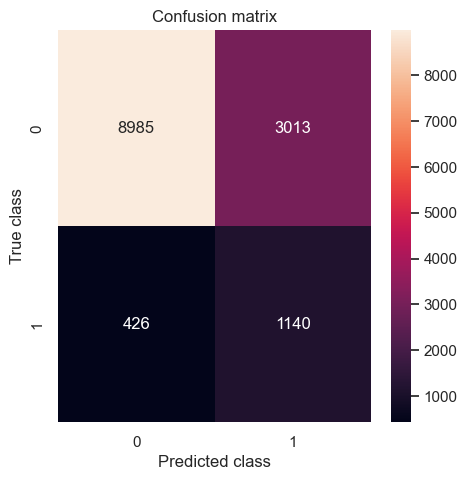

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     11998
           1       0.27      0.73      0.40      1566

    accuracy                           0.75     13564
   macro avg       0.61      0.74      0.62     13564
weighted avg       0.88      0.75      0.79     13564



In [1068]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


In [1069]:
# Obtener las predicciones en el conjunto de entrenamiento
train_predictions = model.predict(X_train_res)


# Obtener las predicciones en el conjunto de prueba
test_predictions = model.predict(X_test)


In [1070]:
# Calcular el recall en el conjunto de entrenamiento
train_recall = recall_score(y_train_res, train_predictions)

# Calcular el recall en el conjunto de prueba
test_recall = recall_score(y_test, test_predictions)

print("Recall en el conjunto de entrenamiento:", train_recall)
print("Recall en el conjunto de prueba:", test_recall)


Recall en el conjunto de entrenamiento: 0.7473857613522418
Recall en el conjunto de prueba: 0.7279693486590039


In [1071]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separa las características (features) y la variable objetivo (target)
X= df_encoded2.drop(columns=["age", "balance", "loan", "housing", "default","month", "contact", "day", "campaign", "pdays", "previous", "poutcome", "debt_status"])
y= df_encoded["p_fijo"]

# Aplica el oversampling utilizando SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X_train, y_train)

# Crea un nuevo dataframe con los datos oversampleados
df_oversampled = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)

# Verifica los resultados
print("Tamaño del dataframe original:", df_encoded2.shape)
print("Tamaño del dataframe oversampleado:", df_oversampled.shape)


Tamaño del dataframe original: (45211, 23)
Tamaño del dataframe oversampleado: (55848, 11)


In [1072]:
from imblearn.under_sampling import NearMiss
from collections import Counter

us = NearMiss(n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 27924, 1: 3723})
Distribution of class labels after resampling Counter({0: 3723, 1: 3723})


In [1073]:
model = RandomForestClassifier(oob_score=True, n_jobs=3,class_weight="balanced", max_depth=2 ,n_estimators=1, criterion='entropy', warm_start=False, max_samples=78,random_state=123)
model.fit(X_oversampled, y_oversampled)
    
# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)
    
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print(recall,f1)

0.8908045977011494 0.31134917977904253


In [1074]:
# Obtener las predicciones en el conjunto de entrenamiento
train_predictions = model.predict(X_oversampled)


# Obtener las predicciones en el conjunto de prueba
test_predictions = model.predict(X_test)


In [1075]:
# Calcular el recall en el conjunto de entrenamiento
train_recall = recall_score(y_oversampled, train_predictions)

# Calcular el recall en el conjunto de prueba
test_recall = recall_score(y_test, test_predictions)

print("Recall en el conjunto de entrenamiento:", train_recall)
print("Recall en el conjunto de prueba:", test_recall)


Recall en el conjunto de entrenamiento: 0.906066466122332
Recall en el conjunto de prueba: 0.8908045977011494


In [1076]:
k = 10
scores = cross_val_score(rfc, X_oversampled, y_oversampled, cv=k, scoring='recall')

rfc_pred = cross_val_predict(rfc, X, y, cv=k)

# Exactitud (accuracy) 
accuracy = accuracy_score(y, rfc_pred)

# Precisión
precision = precision_score(y, rfc_pred)

# Sensibilidad (recall)
recall = recall_score(y, rfc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y, rfc_pred).ravel()
specificity = tn / (tn + fp)

# F1 Score
f1 = f1_score(y, rfc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Random Forest Classifier"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63
5,Cross Validated Logistic Reg.,77.35,31.68,80.96,76.87,45.54
6,Random Forest Classifier,78.25,32.63,80.89,77.90,46.51
7,Cross Validated Random Forest Classifier,77.49,32.02,82.23,76.87,46.09
8,Cross Validated Random Forest Classifier,74.60,28.76,79.26,73.99,42.20


In [1077]:
import numpy as np

X_combined = np.concatenate((X_oversampled, X_test), axis=0)
y_combined = np.concatenate((y_oversampled, y_test), axis=0)


In [1078]:
scores = cross_val_score(model, X_combined, y_combined, cv=k, scoring='recall')


In [1079]:
scores.mean()

0.5543574092912852

In [1084]:
# Crear el clasificador RandomForestClassifier
rfc = RandomForestClassifier(class_weight= "balanced", max_depth=7, n_estimators=30, criterion='gini', warm_start=True, random_state=123)

# Entrenar el modelo con el conjunto de entrenamiento oversampled
rfc.fit(X_oversampled, y_oversampled)

# Realizar la validación cruzada con el conjunto de prueba original
scores = cross_val_score(rfc, X_test, y_test, cv=k, scoring='recall')

# Obtener las métricas de evaluación en el conjunto de prueba original
rfc_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, rfc_pred)
precision = precision_score(y_test, rfc_pred)
recall = recall_score(y_test, rfc_pred)
tn, fp, fn, tp = confusion_matrix(y_test, rfc_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, rfc_pred)

# Crear un dataframe con las métricas
nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier con SMOTE"] ,
                                'Exactitud': [round(accuracy*100,2)], 
                                'Precisión': [round(precision*100,2)], 
                                'Sensibilidad': [round(recall*100,2)], 
                                'Especificidad': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Exactitud,Precisión,Sensibilidad,Especificidad,F1 Score
0,KNeighbors Classifier,87.68,45.62,28.10,95.57,34.78
1,SVC,78.75,33.28,81.46,78.39,47.26
2,Decision Tree Classifier,76.00,30.31,81.08,75.33,44.13
3,Cross Validated Decision Tree Clasif.,77.35,31.68,80.96,76.87,45.54
4,Logistic Regression,89.13,60.88,19.58,98.33,29.63
5,Cross Validated Logistic Reg.,77.35,31.68,80.96,76.87,45.54
6,Random Forest Classifier,78.25,32.63,80.89,77.90,46.51
7,Cross Validated Random Forest Classifier,77.49,32.02,82.23,76.87,46.09
8,Cross Validated Random Forest Classifier,74.60,28.76,79.26,73.99,42.20
9,Random Forest Classifier con SMOTE,85.86,44.11,84.16,86.08,57.88
